In [3]:
from enum import Enum


class Season(Enum):
    SPRING = 1
    SUMMER = 2
    AUTUMN = 3
    WINTER = 4

print(f'{Season.SPRING.value}')

1


### [Protocol](https://www.youtube.com/watch?v=yatgY4NpZXE)

In [8]:
from dataclasses import dataclass
from typing import Protocol

@dataclass
class Customer:
    name: str
    phone: str
    number: str
    exp_month: int
    exp_year: int

class CardInfo(Protocol):
    @property
    def number(self)-> str:
        ...

    @property
    def exp_month(self)-> str:
        ...

    @property
    def exp_year(self)-> int:
        ...

@dataclass
class PhoneBook:
    name: str
    phone: str



def check_cc(card: CardInfo)-> bool:
    print(f"Info Received : {card.name}, {card.exp_month}")

    return True

phone_entry = PhoneBook(name="Bob", phone="123456")

alice = Customer(
    name="Alice",
    phone="123456",
    number="01234567890",
    exp_month=9,
    exp_year=2025
)

check_cc(alice)

check_cc(phone_entry)



Info Received : Alice, 9


AttributeError: 'PhoneBook' object has no attribute 'exp_month'

### [Powerful one-liners](https://www.instagram.com/p/ClG5_DAPA5D/?igshid=MDJmNzVkMjY%3D)

In [12]:
# Swap Numbers
a = 10
b = 20
print(f"{a=} , {b=}")
a,b = b,a
print(f"{a=} , {b=}")

# Reverse a string
my_str = "In God We Trust!"
print(f"{my_str} Reversed : {my_str[::-1]}")

# Factorial
fact = lambda n:[1,0][n>1] or fact(n-1)*n
print(f"{fact(5)=}")
print(f"{fact(10)=}")

# Sum of Fibonacci
fib = lambda x: x if x<=1 else fib(x-1) + fib(x-2)
print(f"{fib(20)=}")

a=10 , b=20
a=20 , b=10
In God We Trust! Reversed : !tsurT eW doG nI
fact(5)=120
fact(10)=3628800
fib(20)=6765


### [Print a heart](https://twitter.com/engineers_feed/status/1591820209928933378?t=-qx8N4k4lguk_FbqhwMeKQ&s=03)

In [13]:
print('\n'.join
 ([''.join
   ([('Engineer'[(x-y)%8 ]
     if((x*0.05)**2+(y*0.1)**2-1)
      **3-(x*0.05)**2*(y*0.1)
       **3<=0 else' ')
        for x in range(-30,30)])
         for y in range(15,-15,-1)]))

                                                            
                                                            
                                                            
                erEnginee           gineerEng               
            ineerEngineerEngi   rEngineerEngineer           
          gineerEngineerEngineerEngineerEngineerEng         
         gineerEngineerEngineerEngineerEngineerEngin        
        gineerEngineerEngineerEngineerEngineerEnginee       
        ineerEngineerEngineerEngineerEngineerEngineer       
        neerEngineerEngineerEngineerEngineerEngineerE       
        eerEngineerEngineerEngineerEngineerEngineerEn       
        erEngineerEngineerEngineerEngineerEngineerEng       
        rEngineerEngineerEngineerEngineerEngineerEngi       
         ngineerEngineerEngineerEngineerEngineerEngi        
          ineerEngineerEngineerEngineerEngineerEngi         
          neerEngineerEngineerEngineerEngineerEngin         
            rEngineerEng

### [Method Resolution Order](https://twitter.com/driscollis/status/1587853771249434624?t=Qaqob4DQqB8CntAMVuNt_A&s=03)

In [9]:
class Tiger:
    pass

class Lion:
    pass

class Liger(Lion, Tiger):
    pass

Liger.__mro__

(__main__.Liger, __main__.Lion, __main__.Tiger, object)

### [lru_cache for webpages](https://twitter.com/driscollis/status/1587110654556733448?t=tGkBAoDeT4PG9CZQvaGc0Q&s=03)

In [38]:
import urllib.request
import urllib.response
import urllib.error

from functools import lru_cache

from typing import Union

import datetime

@lru_cache(maxsize=24)
def get_webpage(module: str)-> Union[type[bytes], None]:
    webpage = f"https://docs.python.org/3/library/{module}.html"
    try:
        with urllib.request.urlopen(webpage) as request:
            page = request.read()

            return page
    except urllib.error.HTTPError as err:
        return None

start_time = datetime.datetime.now()
modules = ['functools','collections','os','sys']
for module in modules :
    page = get_webpage(module)
    if page:
        print(f"{module} page found")

end_time = datetime.datetime.now()
elapsed_time = end_time-start_time
print(f"{elapsed_time}")

functools page found
collections page found
os page found
sys page found
0:00:00.156441


In [31]:
# Clear cache
get_webpage.cache_clear()

### [Use a dictionary to remove duplicates from a list and maintain order](https://twitter.com/testdrivenio/status/1588584363343716353/photo/1)

In [1]:
names = ['Adrastus', 'Hypsioyle', 'Polynices', 'Zeuthes', 'Adrastus','Polynices']

unique_names = list({name: name for name in names}.values())

print(unique_names)

['Adrastus', 'Hypsioyle', 'Polynices', 'Zeuthes']


### [Avoid typeerrors due to shadowing](https://twitter.com/testdrivenio/status/1587134812191485952?t=JefNjhbF_Ve-Nrm7KfVmlw&s=03)

In [8]:
import uuid

# Right way
_id = uuid.uuid4()
print(f"ID = {_id}")

print(f"ID of string 'Thebaid' : {id('Thebaid')}")

# Wrong way 
id = uuid.uuid4()
print(f"ID = {id}")

print(f"ID of string 'Thebaid' : {id('Thebaid')}")

ID = 79ec1f92-c925-4a36-9ae6-a64e6939e928
ID of string 'Thebaid' : 4524245360
ID = 6be4884d-a94f-4386-8796-537bdbbe5683


TypeError: 'UUID' object is not callable

### [DefaultDict usage](https://twitter.com/testdrivenio/status/1585307774778363905/photo/1)

In [24]:
from collections import defaultdict

users = [ 
    {"username" : "Etiocles", "state": "TH"},
    {"username" : "Polynices", "state": "AR"},
    {"username" : "Amphiaraus", "state": "AR"},
]


# BAD
users_by_state = {}
for user in users:
    if user["state"] not in users_by_state:
        users_by_state[user["state"]] = []
    users_by_state[user["state"]].append(user )
print (users_by_state)

# GOOD
users_by_state = defaultdict(list)
for user in users:
    users_by_state [user ["state"]].append(user)
print(dict (users_by_state))

{'TH': [{'username': 'Etiocles', 'state': 'TH'}], 'AR': [{'username': 'Polynices', 'state': 'AR'}, {'username': 'Amphiaraus', 'state': 'AR'}]}
{'TH': [{'username': 'Etiocles', 'state': 'TH'}], 'AR': [{'username': 'Polynices', 'state': 'AR'}, {'username': 'Amphiaraus', 'state': 'AR'}]}


### [Timer decorator with @wraps](https://twitter.com/bbelderbos/status/1585220541673517057?t=ZDpGlnrlval8Ywbth65NaQ&s=03)

In [26]:
from functools import wraps
from time import time, sleep

def timing(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time()
        result = func(*args, **kwargs)
        end = time()

        print(f"Elapsed time for {func.__name__} from {start} to {end} is {end-start}")

        return result

    return wrapper

@timing
def a_random_func()-> None:
    sleep(3)
    print("Done")


a_random_func()



Done
Elapsed time for a_random_func from 1667199997.0984058 to 1667200000.103611 is 3.0052051544189453


### [Type Hints for classes](https://twitter.com/testdrivenio/status/1584945392864481282/photo/1)

In [22]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Car:
    top_speed : int

    def drive(self)->str:
        return "Driving"

# BAD
def create_fast_car(car_class: type[Car], top_spee: int)-> Car:
    return car_class(top_speed=100)  

# Drive GOOD Typing - mypy will catch error
print(create_fast_car(Car, 100). drive())

# BAD
def create_fast_car(car_class: Any, top_spee: int)-> Car:
    return car_class(top_speed=100)    

# Drive BAD typing
print(create_fast_car(Car, 100). drive())
print(create_fast_car(object, 100). drive())




Driving
Driving


TypeError: object() takes no arguments

### [How to Get the First Match From a Python List or Iterable](https://realpython.com/python-first-match/?utm_source=notification_summary&utm_medium=email&utm_campaign=2022-10-25)

In [3]:
# transform your whole iterable to a new list and then use .index() to find the first item matching your criterion
# find first name of length 8
# his solution isn’t great, partly because you calculate the criterion for all elements, even if the first item is a match.

names = ["Adrastus", "Capaneus", "Tydeus", "Archemorus", "Hypsipyle"]
print(f"{names=}")
length_of_names = [len(name) for name in names]
print(f"{length_of_names=}")
idx = length_of_names.index(8)
print(f"{names[idx]=}")

names=['Adrastus', 'Capaneus', 'Tydeus', 'Archemorus', 'Hypsipyle']
length_of_names=[8, 8, 6, 10, 9]
names[idx]='Adrastus'


In [4]:
# Using IN
# Only returns boolean

countries = [
    {"country": "Austria", "population": 8_840_521},
    {"country": "Canada", "population": 37_057_765},
    {"country": "Cuba", "population": 11_338_138},
    {"country": "Dominican Republic", "population": 10_627_165},
    {"country": "Germany", "population": 82_905_782},
    {"country": "Norway", "population": 5_311_916},
    {"country": "Philippines", "population": 106_651_922},
    {"country": "Poland", "population": 37_974_750},
    {"country": "Scotland", "population": 5_424_800},
    {"country": "United States", "population": 326_687_501},
]

target_country = {"country": "Philippines", "population": 106_651_922}

target_country in countries


True

In [8]:
# for loop - with or without break

countries = [
    {"country": "Austria", "population": 8_840_521},
    {"country": "Canada", "population": 37_057_765},
    {"country": "Cuba", "population": 11_338_138},
    {"country": "Dominican Republic", "population": 10_627_165},
    {"country": "Germany", "population": 82_905_782},
    {"country": "Norway", "population": 5_311_916},
    {"country": "Philippines", "population": 106_651_922},
    {"country": "Poland", "population": 37_974_750},
    {"country": "Scotland", "population": 5_424_800},
    {"country": "United States", "population": 326_687_501},
]

# Only the first
for country in countries:
    if country['population'] > 30_000_000 :
        print(f"{country=}")
        break

print("\n")

# All countries
for country in countries:
    if country['population'] > 30_000_000 :
        print(f"{country=}")

print("\n")

# Python 10 + structural pattern matching
for country in countries:
    match country:
        case {"population": pop_count} if pop_count > 30_000_000:
            print(f"{country=}")


country={'country': 'Canada', 'population': 37057765}


country={'country': 'Canada', 'population': 37057765}
country={'country': 'Germany', 'population': 82905782}
country={'country': 'Philippines', 'population': 106651922}
country={'country': 'Poland', 'population': 37974750}
country={'country': 'United States', 'population': 326687501}


country={'country': 'Canada', 'population': 37057765}
country={'country': 'Germany', 'population': 82905782}
country={'country': 'Philippines', 'population': 106651922}
country={'country': 'Poland', 'population': 37974750}
country={'country': 'United States', 'population': 326687501}


In [11]:
# generator comprehension

countries = [
    {"country": "Austria", "population": 8_840_521},
    {"country": "Canada", "population": 37_057_765},
    {"country": "Cuba", "population": 11_338_138},
    {"country": "Dominican Republic", "population": 10_627_165},
    {"country": "Germany", "population": 82_905_782},
    {"country": "Norway", "population": 5_311_916},
    {"country": "Philippines", "population": 106_651_922},
    {"country": "Poland", "population": 37_974_750},
    {"country": "Scotland", "population": 5_424_800},
    {"country": "United States", "population": 326_687_501},
]


country_generator = (
    country for country in countries
    if country["population"] > 30_000_000
    )
for _ in range(0,10) :
    print(next(country_generator, "No more countries with population > 30 million"))



{'country': 'Canada', 'population': 37057765}
{'country': 'Germany', 'population': 82905782}
{'country': 'Philippines', 'population': 106651922}
{'country': 'Poland', 'population': 37974750}
{'country': 'United States', 'population': 326687501}
No more countries with population > 30 million
No more countries with population > 30 million
No more countries with population > 30 million
No more countries with population > 30 million
No more countries with population > 30 million


### [Comparing the Performance Between Loops and Generators](https://realpython.com/python-first-match/#comparing-the-performance-between-loops-and-generators)

[{'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Pthia', 'population': 60},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10},
 {'country': 'Arcadia', 'population': 10}]
Progress 100%        


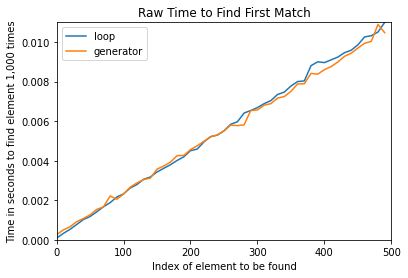

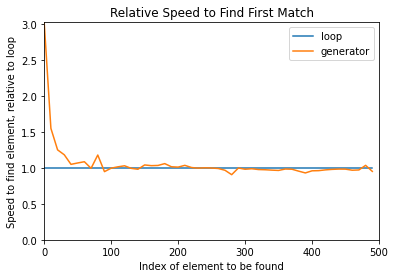

In [18]:
# Step 1 : create a function that can create lists of an arbitrary size with a certain value at a certain position

from pprint import pp
from typing import Dict, List

def build_list(size, fill, value, at_position)->List[Dict[str,str]]:
    return [value if i == at_position else fill for i in range(size)]

pp(
    build_list(
        size=10,
        fill={"country": "Arcadia", "population": 10},
        value={"country": "Pthia", "population": 60},
        at_position=4
    )
)

# Step 2: Function to return first match using loop
def find_match_loop(iterable)->Dict[str,str]:
    for value in iterable:
        if value["population"] > 50:
            return value
    return {"country": "Erewhon", "population": 0}

# Step 2: Function to return first match using loop
def find_match_generator(iterable)->Dict[str,str]:
    for value in iterable:
        if value["population"] > 50:
            return value
    return {"country": "Erewhon", "population": 0}

# Step 3: Function to return first match using generator
def find_match_gen(iterable):
    return next(
      (value for value in iterable if value["population"] > 50),
      {"country": "Erewhon", "population": 0}
    )

# Step 4 - Generate data using timeit
# produce two parallel lists, each containing the time it took to find the element with either the loop or the generator. 
# produce a third list that’ll contain the corresponding position of the target element in the list.
from timeit import timeit

TIMEIT_TIMES = 1000
LIST_SIZE = 500
POSITION_INCREMENT = 10

looping_times = []
generator_times = []
positions = []

for position in range(0, LIST_SIZE, POSITION_INCREMENT):
    print(
        f"Progress {position / LIST_SIZE:.0%}",
        end=f"{3 * ' '}\r",  # Clear previous characters and reset cursor
    )

    positions.append(position)

    list_to_search = build_list(
        LIST_SIZE,
        {"country": "Nowhere", "population": 10},
        {"country": "Atlantis", "population": 100},
        position,
    )

    looping_times.append(
        timeit(
            "find_match_loop(list_to_search)",
            globals=globals(),
            number=TIMEIT_TIMES,
        )
    )
    generator_times.append(
        timeit(
            "find_match_gen(list_to_search)",
            globals=globals(),
            number=TIMEIT_TIMES,
        )
    )

print("Progress 100%")

# use matplotlib to produce a couple of charts from the output
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plot = ax.plot(positions, looping_times, label="loop")
plot = ax.plot(positions, generator_times, label="generator")

plt.xlim([0, LIST_SIZE])
plt.ylim([0, max(max(looping_times), max(generator_times))])

plt.xlabel("Index of element to be found")
plt.ylabel(f"Time in seconds to find element {TIMEIT_TIMES:,} times")
plt.title("Raw Time to Find First Match")
plt.legend()

plt.show()

# Ratio

looping_ratio = [loop / loop for loop in looping_times]
generator_ratio = [
    gen / loop for gen, loop in zip(generator_times, looping_times)
]

fig, ax = plt.subplots()

plot = ax.plot(positions, looping_ratio, label="loop")
plot = ax.plot(positions, generator_ratio, label="generator")

plt.xlim([0, LIST_SIZE])
plt.ylim([0, max(max(looping_ratio), max(generator_ratio))])

plt.xlabel("Index of element to be found")
plt.ylabel("Speed to find element, relative to loop")
plt.title("Relative Speed to Find First Match")
plt.legend()

plt.show()


### [Python meta programming](https://developer.ibm.com/tutorials/ba-metaprogramming-python/)

In [16]:
# type is itself a class, and it is its own type. It's a metaclass.

# Create a class
class ExampleClass:
    class_var = 1
    def __init__(self):
        self.example_var = 'Example Value'

example_object = ExampleClass()

print(f"Type of ExampleClass : {type(ExampleClass)}")
print(f"Type of example_object : {type(example_object)}")

# use inspect
import inspect
print(f"Is ExampleClass a class ? {inspect.isclass(ExampleClass)}")
print(f"Is example_object a class ? {inspect.isclass(example_object)}")
print(f"Is typeof example_object a class ? {inspect.isclass(type(example_object))}")

# Everything is an object in Python, and they are all either instances of classes or instances of metaclasses, except for type.
print(f"Is example_object an instance of ExampleClass ? {isinstance(example_object,ExampleClass)}")
print(f"Is ExampleClass an instance of type ? {isinstance(ExampleClass, type)}")

print(f"ExampleClass Dict : {ExampleClass.__dict__}")
print(f"example_object Dict : {example_object.__dict__}")



Type of ExampleClass : <class 'type'>
Type of example_object : <class '__main__.ExampleClass'>
Is ExampleClass a class ? True
Is example_object a class ? False
Is typeof example_object a class ? True
Is example_object an instance of ExampleClass ? True
Is ExampleClass an instance of type ? True
ExampleClass Dict : {'__module__': '__main__', 'class_var': 1, '__init__': <function ExampleClass.__init__ at 0x115171990>, '__dict__': <attribute '__dict__' of 'ExampleClass' objects>, '__weakref__': <attribute '__weakref__' of 'ExampleClass' objects>, '__doc__': None}
example_object Dict : {'example_var': 'Example Value'}


### [Python Time](https://youtu.be/TFa38ONq5PY)

In [47]:
import time
from datetime import datetime
# As datetime is timezone naive
from pytz import timezone

# datetime replacement
import pendulum

print(f"Time in seconds & fraction of second (float) : {time.time()}")
print(f"Time in nanoseconds (int)) : {time.time_ns()}")

some_date = datetime(2022, 10, 16, 6,5, 4)
print(f"Constructed datetime : {some_date}")

some_date = datetime.fromisoformat("2022-10-16T06:15:04")
print(f"Constructed from isoformat datetime : {some_date}")

print(f"Current date : {datetime.now()}")

print(f"Is {some_date} > {datetime.now()} ? : {some_date > datetime.now()}")

utc = timezone("UTC")
loc = utc.localize(some_date)
print(f"{some_date} localized with timezone: {loc}")

sydney = timezone("Australia/Sydney")
print(f"{some_date} localized with timezone for Sydney: {loc.astimezone(sydney)}")

auckland = timezone("Pacific/Auckland")
print(f"{some_date} localized with timezone for Auckland: {loc.astimezone(auckland)}")

some_date = pendulum.datetime(2022, 10, 16, 6,5, 4, tz="UTC")
print(f"Constructed UTC datetime using pendulum (TZ aware): {some_date}")

some_date = pendulum.datetime(2022, 10, 16, 6,5, 4, tz="Pacific/Auckland")
print(f"Constructed Auckland datetime using pendulum (TZ aware): {some_date}")

print(f"In Timezone Sydney datetime using pendulum (TZ aware): {some_date.in_timezone('Australia/Sydney')}")

print(f"Add 5 minutes to {some_date} using pendulum (TZ aware): {some_date.add(minutes=5)}")

print(f"Subtract 10 minutes from {some_date} using pendulum (TZ aware): {some_date.subtract(minutes=10)}")

pendulum.set_locale("de")
print(f"Locale Germany : {some_date.format('dddd DD MMMM YYYY')}")

pendulum.set_locale("fr")
print(f"Locale France : {some_date.format('dddd DD MMMM YYYY')}")

print(f"Locale Italy, override France : {some_date.format('dddd DD MMMM YYYY',locale='it')}")

print(f"Locale Italy, override France , use L: {some_date.format('LLLL',locale='it')}")


print(f"For humans: {pendulum.now().add(years=1).diff_for_humans(locale='en')}")
print(f"For humans, absolute value: {pendulum.now().add(years=1).diff_for_humans(absolute=True, locale='en')}")

print(f"Day of year, month, week : {pendulum.now().day_of_year}, {pendulum.now().days_in_month}, {pendulum.now().day_of_week}")

print(f"int & float timestamp : {pendulum.now().int_timestamp}, {pendulum.now().float_timestamp}")

print(f"Start of day & end of hour: {pendulum.now().start_of('day')}, {pendulum.now()._end_of_hour()}")

pendulum.set_locale("en")
print(f"Duration: {pendulum.duration(years=3, months=4)}")
print(f"Duration in days: {pendulum.duration(years=3, months=4).days}")


Time in seconds & fraction of second (float) : 1665871162.497061
Time in nanoseconds (int)) : 1665871162497147000
Constructed datetime : 2022-10-16 06:05:04
Constructed from isoformat datetime : 2022-10-16 06:15:04
Current date : 2022-10-16 10:59:22.497495
Is 2022-10-16 06:15:04 > 2022-10-16 10:59:22.497530 ? : False
2022-10-16 06:15:04 localized with timezone: 2022-10-16 06:15:04+00:00
2022-10-16 06:15:04 localized with timezone for Sydney: 2022-10-16 17:15:04+11:00
2022-10-16 06:15:04 localized with timezone for Auckland: 2022-10-16 19:15:04+13:00
Constructed UTC datetime using pendulum (TZ aware): 2022-10-16T06:05:04+00:00
Constructed Auckland datetime using pendulum (TZ aware): 2022-10-16T06:05:04+13:00
In Timezone Sydney datetime using pendulum (TZ aware): 2022-10-16T04:05:04+11:00
Add 5 minutes to 2022-10-16T06:05:04+13:00 using pendulum (TZ aware): 2022-10-16T06:10:04+13:00
Subtract 10 minutes from 2022-10-16T06:05:04+13:00 using pendulum (TZ aware): 2022-10-16T05:55:04+13:00
Lo

### Dictionary tips

In [5]:
# Sorting a dictionary

from operator import itemgetter
my_dict = {
    "third" : 3 ,
    "first" : 1 ,
    "second" : 2
}

ordered_dict = sorted(my_dict.items(), key=itemgetter(1))
print(ordered_dict)
print(itemgetter(0)('ABCDE'))
print(itemgetter(1)('ABCDE'))

[('first', 1), ('second', 2), ('third', 3)]
A
B


In [5]:
# Sorting a list of lists after conversion from dictionary

from operator import itemgetter

my_dict_1 = {
    "name" : "Achilles",
    "height" : "1.8",
    "age" : "20"
}

my_dict_2 = {
    "name" : "Brisaeus",
    "height" : "1.5",
    "age" : "18"
}

my_dict_3 = {
    "name" : "Calchas",
    "height" : "1.6",
    "age" : "48"
}

my_list = [list_item for list_item in (list(my_dict_1.items()), list(my_dict_2.items()), list(my_dict_3.items()))]
print(my_list)

sorted_by_height = sorted(my_list, key=itemgetter(1))
print(sorted_by_height)

sorted_by_age_reverse = sorted(my_list, key=itemgetter(2), reverse=True)
print(sorted_by_age_reverse)

[[('name', 'Achilles'), ('height', '1.8'), ('age', '20')], [('name', 'Brisaeus'), ('height', '1.5'), ('age', '18')], [('name', 'Calchas'), ('height', '1.6'), ('age', '48')]]
[[('name', 'Brisaeus'), ('height', '1.5'), ('age', '18')], [('name', 'Calchas'), ('height', '1.6'), ('age', '48')], [('name', 'Achilles'), ('height', '1.8'), ('age', '20')]]
[[('name', 'Calchas'), ('height', '1.6'), ('age', '48')], [('name', 'Achilles'), ('height', '1.8'), ('age', '20')], [('name', 'Brisaeus'), ('height', '1.5'), ('age', '18')]]


### [Enums](https://realpython.com/python-enum/?__s=hbgzohut8js4gstozbvu)

In [16]:
# Ensure you cant change Enum values

from enum import Enum

class Grade(Enum):
    A = 90
    B = 80
    C = 70
    D = 60
    F = 0

print(list(Grade))

print(Grade.B.value)

Grade.B.value = 0

Grade.B = 1

[<Grade.A: 90>, <Grade.B: 80>, <Grade.C: 70>, <Grade.D: 60>, <Grade.F: 0>]
80


AttributeError: can't set attribute

In [24]:
# Enums

from enum import Enum, auto

# use functional API with name-value tuples
HTTPStatusCode = Enum(
    value = "HTTPStatusCode",
    names = [
        ("OK", 200),
        ("CREATED", 201),
        ("BAD_REQUEST", 400),
        ("NOT_FOUND", 404),
        ("SERVER_ERROR", 500),
    ]
)

print(list(HTTPStatusCode))

# override _generate_next_value_()
class CardinalDirection(Enum):
    def _generate_next_value_(name, start, count, last_values):
        return name[0]
    NORTH = auto()
    SOUTH = auto()
    EAST = auto()
    WEST = auto()


print(list(CardinalDirection))

# Use aliases to get all entries
class OperatingSystem(Enum):
    UBUNTU = "linux"
    MACOS = "darwin"
    WINDOWS = "win"
    DEBIAN = "linux"

# Aliases aren't listed
print(list(OperatingSystem))

# To access aliases, use __members__
print(list(OperatingSystem.__members__.items()))


[<HTTPStatusCode.OK: 200>, <HTTPStatusCode.CREATED: 201>, <HTTPStatusCode.BAD_REQUEST: 400>, <HTTPStatusCode.NOT_FOUND: 404>, <HTTPStatusCode.SERVER_ERROR: 500>]
[<CardinalDirection.NORTH: 'N'>, <CardinalDirection.SOUTH: 'S'>, <CardinalDirection.EAST: 'E'>, <CardinalDirection.WEST: 'W'>]
[<OperatingSystem.UBUNTU: 'linux'>, <OperatingSystem.MACOS: 'darwin'>, <OperatingSystem.WINDOWS: 'win'>]
[('UBUNTU', <OperatingSystem.UBUNTU: 'linux'>), ('MACOS', <OperatingSystem.MACOS: 'darwin'>), ('WINDOWS', <OperatingSystem.WINDOWS: 'win'>), ('DEBIAN', <OperatingSystem.UBUNTU: 'linux'>)]


In [26]:
# unique decrorator to stop duplicate values

from enum import Enum, unique

@unique
class OperatingSystem(Enum):
    UBUNTU = "linux"
    MACOS = "darwin"
    WINDOWS = "win"
    DEBIAN = "linux"


ValueError: duplicate values found in <enum 'OperatingSystem'>: DEBIAN -> UBUNTU

In [28]:
# Iterating through enums

from enum import Enum

class Flavor(Enum):
    VANILLA = 1
    CHOCOLATE = 2
    MINT = 3


for flavor in Flavor:
    print(flavor.name , flavor.value)

VANILLA 1
CHOCOLATE 2
MINT 3


In [33]:
# Sorting enums
from enum import Enum

class Flavor(Enum):
    VANILLA = 1
    CHOCOLATE = 2
    MINT = 3

print(sorted(Flavor, key=lambda flavor : flavor.value, reverse=True))

[<Flavor.MINT: 3>, <Flavor.CHOCOLATE: 2>, <Flavor.VANILLA: 1>]


In [35]:
# overriding & customising

from enum import Enum

class Mood(Enum):
    FUNKY = 1
    MAD = 2
    HAPPY = 3

    def describe_mood(self):
        return self.name, self.value

    def __str__(self):
        return f"I feel {self.name}"

    @classmethod
    def favorite_mood(cls):
        return cls.HAPPY


print(Mood.HAPPY.describe_mood())

print(Mood.HAPPY)

Mood.favorite_mood()



('HAPPY', 3)
I feel HAPPY


<Mood.HAPPY: 3>

In [36]:
# Strategy pattern

from enum import Enum

class Sort(Enum):
    ASCENDING = 1
    DESCENDING = 2
    def __call__(self, values):
        return sorted(values, reverse=self is Sort.DESCENDING)


numbers = [5, 2, 7, 6, 3, 9, 8, 4]

print(Sort.ASCENDING(numbers))

print(Sort.DESCENDING(numbers))


[2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2]


In [38]:
# IntEnum for forcing integer values

from enum import IntEnum

class Size(IntEnum):
    S = 1
    M = 2
    L = 3
    XL = "4"


print(list(Size))


class Size(IntEnum):
    S = 1
    M = 2
    L = 3
    XL = "4.o"

[<Size.S: 1>, <Size.M: 2>, <Size.L: 3>, <Size.XL: 4>]


ValueError: invalid literal for int() with base 10: '4.o'

In [39]:
# Practical example 1

from enum import IntEnum
from http.client import HTTPSConnection

class HTTPStatusCode(IntEnum):
    OK = 200
    CREATED = 201
    BAD_REQUEST = 400
    NOT_FOUND = 404
    SERVER_ERROR = 500


def process_response(response):
    match response.getcode():
        case HTTPStatusCode.OK:
            print("Success!")
        case HTTPStatusCode.CREATED:
            print("Successfully created!")
        case HTTPStatusCode.BAD_REQUEST:
            print("Bad request")
        case HTTPStatusCode.NOT_FOUND:
            print("Not Found")
        case HTTPStatusCode.SERVER_ERROR:
            print("Internal server error")
        case _:
            print("Unexpected status")


connection = HTTPSConnection("www.python.org")
try:
    connection.request("GET", "/")
    response = connection.getresponse()
    process_response(response)
finally:
    connection.close()

Success!


In [44]:
# Ptactical example 2

from enum import Enum, auto

class State(Enum):
    EMPTY = auto()
    STOPPED = auto()
    PAUSED = auto()
    PLAYING = auto()

class DiskPlayer:
    def __init__(self):
        self.state = State.EMPTY

    def insert_disk(self):
        if self.state is State.EMPTY:
            self.state = State.STOPPED
        else:
            raise ValueError("disk already inserted")

    def eject_disk(self):
        if self.state is State.EMPTY:
            raise ValueError("no disk inserted")
        else:
            self.state = State.EMPTY

    def play(self):
        if self.state in {State.STOPPED, State.PAUSED}:
            self.state = State.PLAYING

    def pause(self):
        if self.state is State.PLAYING:
            self.state = State.PAUSED
        else:
            raise ValueError("can't pause when not playing")

    def stop(self):
        if self.state in {State.PLAYING, State.PAUSED}:
            self.state = State.STOPPED
        else:
            raise ValueError("can't stop when not playing or paused")

actions = [
    DiskPlayer.insert_disk,
    DiskPlayer.play,
    DiskPlayer.pause,
    DiskPlayer.stop,
    DiskPlayer.eject_disk,
    DiskPlayer.insert_disk,
    DiskPlayer.play,
    DiskPlayer.stop,
    DiskPlayer.eject_disk,
]
player = DiskPlayer()
for action in actions:
    action(player)
    print(player.state)

State.STOPPED
State.PLAYING
State.PAUSED
State.STOPPED
State.EMPTY
State.STOPPED
State.PLAYING
State.STOPPED
State.EMPTY


### [Chaining methods](https://twitter.com/bbelderbos/status/1572616824713265158?t=-HAkswAe99Lo2sfGzDIuEw&s=03)

In [75]:
from dataclasses import dataclass
from typing_extensions import Self


@dataclass
class Calculator:
    number: int

    @property
    def double(self)-> Self:
        self.number *= 2

        return self

    @property
    def halve(self)-> Self:
        self.number /= 2

        return self

calc = Calculator(number=6)

print(calc)
print(calc.number)

print(calc.double)
print(calc.halve)

print(calc.double.double)
print(calc.double.halve.double.halve.double)


Calculator(number=6)
6
Calculator(number=12)
Calculator(number=6.0)
Calculator(number=24.0)
Calculator(number=48.0)


### [Deep Dive into Pathlib](https://youtu.be/UcKkmwaRbsQ)

In [42]:
from os import chdir
from pathlib import Path

import logging

logging.basicConfig(level=logging.INFO, format="[{asctime}] - {funcName} - {message}", style='{')
logger = logging.getLogger("PATHLIBDEEPDIVE")

def main()-> None:
    logger.info("Pathlib Deep Dive") 

    chdir("/Users/vrbabu/Documents/code/jupyter_misc")

    logger.info(f"Current working directory : {Path.cwd()}")
    logger.info(f"Current home directory : {Path.home()}")

    my_path = Path("/Users/vrbabu/Documents/code/")
    logger.info(f"My Path : {my_path}")
    logger.info(f"Does path {my_path} exist ? : {my_path.exists()}")

    new_path = Path.cwd() / "Documents" / "DoesNotExist"
    logger.info(f"Path constructed using / operarator : {new_path}")

    path_from_pathlib_deepdive_settings_yaml = Path.cwd() / "pathlib_deepdive_settings.yaml"
    if path_from_pathlib_deepdive_settings_yaml.exists():
        with path_from_pathlib_deepdive_settings_yaml.open() as file:
            logger.info(f"\n{file.read()}")

    unqualified_path = Path("pathlib_deepdive_settings.yaml")
    logger.info(f"Qualified path for {unqualified_path} is {unqualified_path.resolve()}")
    logger.info(f"Parent path for {unqualified_path} is {unqualified_path.resolve().parent}")
    logger.info(f"File name from {unqualified_path.resolve()} is {unqualified_path.resolve().name}")
    logger.info(f"Stem of File name from {unqualified_path.resolve()} is {unqualified_path.resolve().stem}")
    logger.info(f"Suffix of File name from {unqualified_path.resolve()} is {unqualified_path.resolve().suffix}")
    
    logger.info(f"Is {unqualified_path.resolve().name} a directory ? {unqualified_path.resolve().is_dir()}")
    logger.info(f"Is {unqualified_path.resolve().name} a file ? {unqualified_path.resolve().is_file()}")

    # Create & delete files
    new_file = Path.cwd() / "test.txt"
    new_file.touch()
    logger.info(f"Has {new_file} been created ? {new_file.exists()}")
    new_file.write_text("In God We Trust!")
    logger.info(f"Contents of {new_file} : \n {new_file.read_text()}")
    new_file.unlink()
    logger.info(f"Does {new_file} exist anymore ? {new_file.exists()}")

    # Create & delete directories
    new_dir = Path.cwd() / "test_dir"
    if not new_dir.exists() :
        new_dir.mkdir()
    logger.info(f"Does {new_dir} exist ? {new_dir.exists()}")

    chdir(new_dir)
    logger.info(f"Current working directory : {Path.cwd()}")

    chdir(new_dir.parent)
    logger.info(f"Current working directory : {Path.cwd()}")

    new_dir.rmdir()
    logger.info(f"Does {new_dir} exist ? {new_dir.exists()}")

if __name__ == "__main__":
    main()

[2022-09-26 09:21:41,462] - main - Pathlib Deep Dive
[2022-09-26 09:21:41,463] - main - Current working directory : /Users/vrbabu/Documents/code/jupyter_misc
[2022-09-26 09:21:41,463] - main - Current home directory : /Users/vrbabu
[2022-09-26 09:21:41,464] - main - My Path : /Users/vrbabu/Documents/code
[2022-09-26 09:21:41,464] - main - Does path /Users/vrbabu/Documents/code exist ? : True
[2022-09-26 09:21:41,464] - main - Path constructed using / operarator : /Users/vrbabu/Documents/code/jupyter_misc/Documents/DoesNotExist
[2022-09-26 09:21:41,465] - main - 
path: usr/tmp
other: hi
[2022-09-26 09:21:41,466] - main - Qualified path for pathlib_deepdive_settings.yaml is /Users/vrbabu/Documents/code/jupyter_misc/pathlib_deepdive_settings.yaml
[2022-09-26 09:21:41,466] - main - Parent path for pathlib_deepdive_settings.yaml is /Users/vrbabu/Documents/code/jupyter_misc
[2022-09-26 09:21:41,466] - main - File name from /Users/vrbabu/Documents/code/jupyter_misc/pathlib_deepdive_settings.y

In [44]:
pip install pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
You should consider upgrading via the '/Users/vrbabu/Documents/code/jupyter_misc/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pyyaml

  Using cached PyYAML-6.0-cp310-cp310-macosx_11_0_arm64.whl (173 kB)
You should consider upgrading via the '/Users/vrbabu/Documents/code/jupyter_misc/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
# settings in file using pydantic

from dataclasses import dataclass
import pydantic
import yaml
from pathlib import Path
import logging

logging.basicConfig(level=logging.INFO, format="{asctime} - {funcName} - {message}", style='{')
logger = logging.getLogger("PYDANTICSETTINGS")

class PydanticSettings(pydantic.BaseModel):
    path: Path
    other: str

@dataclass
class Settings:
    path: Path
    other: str

def main()-> None:
    settings_file = Path.cwd() / "pathlib_deepdive_settings.yaml"
    parsed_yaml = yaml.safe_load(settings_file.read_text())
    settings = PydanticSettings(**parsed_yaml)

    logger.info(f"Settings : \n {settings}")
    logger.info(f"Path : {settings.path}")
    logger.info(f"Other : {settings.other}")

    # Supposed to fail as dataclass has no out of box support for Path
    # But it works
    settings = Settings(**parsed_yaml)
    logger.info(f"Settings : \n {settings}")
    logger.info(f"Path : {settings.path}")
    logger.info(f"Other : {settings.other}")

if __name__ == "__main__":
    main()
   

[2022-09-26 10:24:04,494] - main - Settings : 
 path=PosixPath('usr/tmp') other='hi'
[2022-09-26 10:24:04,495] - main - Path : usr/tmp
[2022-09-26 10:24:04,495] - main - Other : hi
[2022-09-26 10:24:04,495] - main - Settings : 
 Settings(path='usr/tmp', other='hi')
[2022-09-26 10:24:04,496] - main - Path : usr/tmp
[2022-09-26 10:24:04,496] - main - Other : hi


In [66]:
# Operator overloading
from __future__ import annotations

@dataclass
class Vector:
    x: float
    y: float

    def __truediv__(self, other: float)-> Vector:
        return Vector(self.x / other, self.y / other)

    def __add__(self, other: Vector)-> Vector:
        return Vector(self.x + other.x, self.y+other.y)

def main()-> None:
    my_vector = Vector(2,4)

    print(f"x : {my_vector.x} , y :{my_vector.y}")
    print(f"Vector/2 : {my_vector/2}")

    my_second_vector = Vector(6,8)
    print(f"Add {my_vector} + {my_second_vector} : {my_vector+my_second_vector}")


if __name__ == "__main__":
    main()

x : 2 , y :4
Vector/2 : Vector(x=1.0, y=2.0)
Add Vector(x=2, y=4) + Vector(x=6, y=8) : Vector(x=8, y=12)


## Find longest word

In [4]:
# Beginners version

def get_longest(words: list)-> str:
    longest = ""
    longest_length = 0
    for idx in range(len(words)):
        if len(words[idx]) > longest_length:
            longest = words[idx]
            longest_length = len(words[idx])

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")


Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [5]:
# Version 2 , with lower number of calls to len

def get_longest(words: list)-> str:
    longest = ""
    longest_length = 0
    for idx in range(len(words)):
        this_length = len(words[idx])
        if this_length > longest_length:
            longest = words[idx]
            longest_length = this_length

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [6]:
# Version 3 , using iteration function of for over words

def get_longest(words: list)-> str:
    longest = ""
    longest_length = 0
    for word in words:
        this_length = len(word)
        if this_length > longest_length:
            longest = word
            longest_length = this_length

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [7]:
# Version 4 , grouping related assignments

def get_longest(words: list)-> str:
    longest , longest_length= "", 0
    for word in words:
        this_length = len(word)
        if this_length > longest_length:
            longest, longest_length = word, this_length

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [8]:
# version 5, with batch computing

def get_longest(words: list)-> str:
    longest , longest_length= "", 0
    word_lengths = [len(word) for word in words]
    for word, word_length in zip(words, word_lengths):
        if word_length > longest_length:
            longest, longest_length = word, word_length

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [9]:
# Version 6 , using Lazy map

def get_longest(words: list)-> str:
    longest , longest_length= "", 0
    
    for word, word_length in zip(words, map(len,words)):
        if word_length > longest_length:
            longest, longest_length = word, word_length

    return longest, longest_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [11]:
# Version 7, sorting tuples

def get_longest(words: list)-> str:
    longest_word_and_length = max([(len(word), word) for word in words])

    return longest_word_and_length

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is (5, 'Trust')


In [1]:
# Version 8, max's keyword

def get_longest(words: list)-> str:
    longest_word = max(words, key=len)

    return longest_word, len(longest_word)

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


In [2]:
# Version 9, key and lambda

def get_longest(words: list)-> str:
    longest_word = max(words, key=lambda s:len(s))

    return longest_word, len(longest_word)

words = ["In", "God", "We", "Trust"]
print(f"Longest word in {words} is {get_longest(words)}")

Longest word in ['In', 'God', 'We', 'Trust'] is ('Trust', 5)


## [Using F-Strings](https://youtu.be/Mfmr_Puhtew)


In [37]:
from dataclasses import dataclass
import datetime
import string

@dataclass
class User:
    first_name: str
    last_name: str

    def __str__(self)-> str:
        return f"{self.first_name} {self.last_name}"

def main():
    number = 800

    # Simple
    print(f"Number is {number}")

    # Hex
    print(f"Number in base 16 is {number:x}")

    # oct
    print(f"Number in base 8 is {number:o}")

    # scientific
    print(f"Number in scientific notation is {number:e}")

    # control digits
    print(f"Number expressed as 6 digits is is {number:06}")

    # control float decimal places
    print(f"Number 100.128456 controlled ()and rounded to 2f is {100.128456:.2f}")

    # Seperators
    print(f"Number 44000000000 seperated by _ is ${44000000000:_}")
    print(f"Number 44000000000 seperated by _ & as float is ${44000000000:_.2f}")

    # As %
    print(f"Number .3589 as % and controlled to 1 place is {.3589:.1%}")

    # Right align
    for i in range(7,13):
        print(f"The number is {i:4}")

    # Right align text
    print(f"{'Hello':_>10}")
    print(f"{'Hello':^10}")
    print(f"{'Hello':_<10}")

    # Options for classes
    user = User(first_name="Elon", last_name="Musk")
    # use __str__
    print(f"{user}")
    # user built-in __repr__
    print(f"{user!r}")
    print(f"{repr(user)}")

    # date & Time formatting
    today = datetime.datetime.now()
    print(f"{today}")
    print(f"{today:%H:%M-%S#%f}")
    print(f"{today:%Y-%m-%d}")
    print(f"{today:%D}")
    print(f"{today:%T}")
    print(f"{today:%A}")
    print(f"{today:%B}")
    print(f"{today:%x}")
    print(f"{today:%X}")

    # Escape
    print(f"{{}}")
    print(f"{{\"}}")

    # name variables
    x = 45
    y = 57
    print(f"{x=}, {y=}")

if __name__ == "__main__":
    main()



Number is 800
Number in base 16 is 320
Number in base 8 is 1440
Number in scientific notation is 8.000000e+02
Number expressed as 6 digits is is 000800
Number 100.128456 controlled ()and rounded to 2f is 100.13
Number 44000000000 seperated by _ is $44_000_000_000
Number 44000000000 seperated by _ & as float is $44_000_000_000.00
Number .3589 as % and controlled to 1 place is 35.9%
The number is    7
The number is    8
The number is    9
The number is   10
The number is   11
The number is   12
_____Hello
  Hello   
Hello_____
Elon Musk
User(first_name='Elon', last_name='Musk')
User(first_name='Elon', last_name='Musk')
2022-09-11 20:28:27.876834
20:28-27#876834
2022-09-11
09/11/22
20:28:27
Sunday
September
09/11/22
20:28:27
{}
{"}
x=45, y=57


### [Dont use inhertance to configure objects](https://youtu.be/TZ5DEugWLp8)

In [14]:
# Incorrect 

from dataclasses import dataclass


@dataclass
class Enemy:
    strength: int
    dexterity: int
    intelligence: int
    health: int

class Zombie(Enemy):
    def __init__(self):
        super().__init__(strength=30, dexterity=40, intelligence=50, health=60)

class EvilOverLord(Enemy):
    def __init__(self):
        super().__init__(strength=40,dexterity=50, intelligence=60, health=70)

def main():
    zombie = Zombie()
    print(zombie)

    rajesh = EvilOverLord()
    print(rajesh)

if __name__ == "__main__":
    main()

Zombie(strength=30, dexterity=40, intelligence=50, health=60)
EvilOverLord(strength=40, dexterity=50, intelligence=60, health=70)


In [15]:
# Correct

from dataclasses import dataclass


@dataclass
class Enemy:
    strength: int
    dexterity: int
    intelligence: int
    health: int

def create_zombie()-> Enemy:
       return Enemy(strength=30, dexterity=40, intelligence=50, health=60)

def create_eviloverlord()-> Enemy:
        return Enemy(strength=40,dexterity=50, intelligence=60, health=70)

def main():
    zombie = create_zombie()
    print(zombie)

    rajesh = create_eviloverlord()
    print(rajesh)

if __name__ == "__main__":
    main()

Enemy(strength=30, dexterity=40, intelligence=50, health=60)
Enemy(strength=40, dexterity=50, intelligence=60, health=70)


# [Using split](https://twitter.com/mathsppblog/status/1560945777832239104?t=M0iddqcYwKUmru4iUvlpuQ&s=03)

In [1]:
sentence = "In God We Trust. Everyone else pays in cash."

*first_three, rest = sentence.split(" ",3)

print(first_three)
print(rest)

['In', 'God', 'We']
Trust. Everyone else pays in cash.


# [Markdown in Python](https://twitter.com/bbelderbos/status/1560976200910209024?t=7EvJ9O4cardUqi3DCi68ew&s=03)

In [4]:
pip install markdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 KB 3.3 MB/s eta 0:00:00
You should consider upgrading via the '/Users/vrbabu/Documents/code/jupyter_misc/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from markdown import markdown



In [10]:
print(markdown("# This is my header"))

print(markdown("_Emphasised text_"))

print(markdown("> a cool quote"))

<h1>This is my header</h1>
<p><em>Emphasised text</em></p>
<blockquote>
<p>a cool quote</p>
</blockquote>


### [Define allowed values for @dataclass](https://youtu.be/aqTynXNdxy8)

In [6]:
from dataclasses import dataclass
from enum import Enum

class OrgRole(Enum):
    CEO = "ceo"
    PO="Product Owner"
    DEV = "Developer"


@dataclass
class Employee:
    name: str
    role: OrgRole

def main() -> None:
    louis = Employee(name="Louis", role=OrgRole.CEO)
    sarah = Employee(name="Sarah", role=OrgRole.PO)
    print(louis, sarah)
    tanto = Employee(name="Tanto", role="slacker")
    print(tanto)

main()

Employee(name='Louis', role=<OrgRole.CEO: 'ceo'>) Employee(name='Sarah', role=<OrgRole.PO: 'Product Owner'>)
Employee(name='Tanto', role='slacker')


### [itemgetter for sorting](https://twitter.com/realpython/status/1558573410380386305?t=uBSEaTYd4vSCmbp4n8tk5g&s=03)

In [3]:
from operator import itemgetter

fruit_inventory = [
    ('banana', 5),
    ('orange', 10),
    ('apple', 8),
    ('kiwi', 1)
]

# sort by Key
print(sorted(fruit_inventory, key=itemgetter(0)))

# sort by value
print(sorted(fruit_inventory, key=itemgetter(1)))

[('apple', 8), ('banana', 5), ('kiwi', 1), ('orange', 10)]
[('kiwi', 1), ('banana', 5), ('apple', 8), ('orange', 10)]


### reduce and accumulate

In [2]:
from functools import reduce
from operator import add, mul

print(reduce(add,[1,2,3,4]))

print(reduce(mul,[1,2,3,4]))

10
24


In [5]:
from itertools import accumulate
from operator import add, mul

print(list(accumulate([1,2,3,4], add)))

print(list(accumulate([1,2,3,4], mul)))

[1, 3, 6, 10]
[1, 2, 6, 24]


### [merge dictionaries into a third one in one line by simply using **](https://twitter.com/testdrivenio/status/1556316744851267585/photo/1)

In [7]:
fantasy_books = {
    "Rowling":"Harry Potter",
    "Tolkien" : "Lord of the rings"}

romantic_books = {
    "Austen" : "Pride & prejudice",
    "Emily Bronte" : "wuthering heights"
}

all_books = {**fantasy_books, **romantic_books}

print(all_books)

{'Rowling': 'Harry Potter', 'Tolkien': 'Lord of the rings', 'Austen': 'Pride & prejudice', 'Emily Bronte': 'wuthering heights'}


### [@property for constants](https://twitter.com/realpython/status/1557033774537474050?t=RXcbleah8M_6OoPPu-BhNw&s=03)


In [6]:
class ConstantsNameSpace:
    @property
    def PI(self):
        return 3.1415926

    @property
    def EULER_NUMBER(self):
        return 2.718281

constants = ConstantsNameSpace()

print(constants.PI)
print(constants.EULER_NUMBER)

3.1415926
2.718281


In [10]:
# Use dict instead of if - else

from typing import List

def get_min_price(prices_list: List[float])-> float:
    return min(prices_list)

def get_max_price(prices_list: List[float])-> float:
    return max(prices_list)

def get_avg_price(prices_list: List[float])-> float:
    return sum(prices_list) / len(prices_list)


WHAT_PRICE={
    "min" : get_min_price,
    "max" : get_max_price,
    "avg" : get_avg_price
}

def nuqneh(strategy: str, price_list: List[float])-> None:
    return WHAT_PRICE[strategy](price_list)

prices = [10.20, 5.50, 30.60, 1.15]
print(nuqneh("min", prices))
print(nuqneh("max", prices))
print(nuqneh("avg", prices))

1.15
30.6
11.862499999999999


In [24]:
import webbrowser
import tempfile

html_page="""
<html>
    <head>
        <title> testdriven.io</title>
    </head>
    <body>
        <h1> Opening using browser </h1>
    </body>
</html>
"""

with tempfile.NamedTemporaryFile('w', delete=False, suffix='.html') as temp_file:
    url = 'file://' + temp_file.name
    temp_file.write(html_page)

webbrowser.open(url)

True

### Scope , Mutability & Duck typing Oddities

[Talk - Trey Hunner: Python Oddities Explained](https://www.youtube.com/watch?v=nWC73Llo170&list=PL2Uw4_HvXqvYeXy8ab7iRHjA-9HiYhRQl&index=34)

In [2]:
# Scope in functions and lists

# Normal
numbers = [1,2,3]
for number in numbers:
    numbers = numbers + [number]
print(numbers)

[1, 2, 3, 1, 2, 3]


In [3]:
# In a function
numbers = [1,2,3]
def add_numbers(nums):
    for number in nums:
        numbers = numbers + [number]

add_numbers([3,4,5])

UnboundLocalError: local variable 'numbers' referenced before assignment

In [5]:
# Use global
numbers = [1,2,3]
def add_numbers(nums):
    global numbers 
    for number in nums:
        numbers = numbers + [number]

    print(numbers)

add_numbers([3,4,5])

[1, 2, 3, 3, 4, 5]


In [6]:
# Assignment statements change the value pointed to by vraiable
# Mutation using functions change the object itself
numbers = [1,2,3]
def add_numbers(nums):
    numbers.extend(nums)

    print(numbers)

add_numbers([3,4,5])

[1, 2, 3, 3, 4, 5]


In [7]:
# Reading is fine
numbers = [1,2,3]
def add_numbers(nums):
    print(numbers)

add_numbers([3,4,5])

[1, 2, 3]


In [20]:
# assignmnet operator on tuples
a = b = (1,2)

print(a)
print(b)

a += (3,4)
print(a)
print(b)

(1, 2)
(1, 2)
(1, 2, 3, 4)
(1, 2)


In [21]:
# assignmnet operator on lists
a = b = [1,2]

print(a)
print(b)

a += [3,4]
print(a)
print(b)

[1, 2]
[1, 2]
[1, 2, 3, 4]
[1, 2, 3, 4]


In [11]:
# 2 variables can refer to the same object
numbers = [1,2,3]
numbers2 = numbers
numbers2.append(4)
print(numbers2)
print(numbers)
print(numbers is numbers2)
print(f"Numbers : {id(numbers)} , Numbers2 : {id(numbers2)}")

[1, 2, 3, 4]
[1, 2, 3, 4]
True
Numbers : 4475143232 , Numbers2 : 4475143232


In [13]:
# Mutable tuples ???
# No - Lists & Tuples contain pointers to objects , not objects

x=([1],[2])
print(x)

x[0].append(2)
print(x)

y = x[0]
y.append(3)
print(x)

([1], [2])
([1, 2], [2])
([1, 2, 3], [2])


In [18]:
# Assigning lists <-> tuples
duck_list = ['mallard']
duck_list += ('eider', 'pekin')
print(duck_list)

duck_tuple = ('mallard')
duck_tuple += ('eider', 'pekin')
print(duck_tuple)


duck_tuple = ('mallard')
duck_tuple += ['eider', 'pekin']
print(duck_tuple)

['mallard', 'eider', 'pekin']


TypeError: can only concatenate str (not "tuple") to str

In [19]:
# Duck Typing
# Accepts any iterable as long as it fits the shape & style
dict(('ab','cd'))

{'a': 'b', 'c': 'd'}

# Referential Transparency

In [2]:
# No referntia transparency
# substituting 0for sum will only return the last number

from typing import List
def add_numbers_1(num_list: List[int]) -> int:
    sum = 0
    for i in num_list :
        sum = sum + i

    return sum

add_numbers_1([1,2,3,4])

    

10

In [4]:
# Referential Transparency
# using recursion

def add_numbers_2(num_list:List[int])-> int:
    return num_list[0] if len(num_list) == 1 else num_list[0] + add_numbers_2(num_list[1::])

add_numbers_2([1,2,3,4])



10

In [5]:
# Referential Transparency
# using higher order function

from functools import reduce

def add_numbers_3(num_list:List[int])-> int:
    return reduce(lambda a,b:a+b,num_list)

add_numbers_2([1,2,3,4])

10

In [1]:
from pathlib import Path

print(__file__)
# Build paths inside the project like this: BASE_DIR / 'subdir'.
BASE_DIR = Path(__file__).resolve().parent.parent

print(BASE_DIR)

NameError: name '__file__' is not defined

In [1]:
# get wikipedia article using request
import json
from urllib import request

try:
    data = json.load(request.urlopen('https://en.wikipedia.org/api/rest_v1/page/random/summary'))

    print({'title': data['title'],
            'extract': data['extract'],
            'url': data['content_urls']['desktop']['page']}) 


except Exception as error:
    raise error

{'title': 'MV Leif Ericson', 'extract': 'The MV Leif Ericson is a commercial passenger/vehicle ferry in service with the Canadian operator Marine Atlantic. She is currently the oldest vessel in the Marine Atlantic fleet. She was built along with two sister ships by Fosen Mekaniske Verksteder, Norway in the early 1990s. These two are Oslofjord and Patria Seaways.', 'url': 'https://en.wikipedia.org/wiki/MV_Leif_Ericson'}


# Type hints
- [Arjan Codes Video](https://www.youtube.com/watch?v=dgBCEB2jVU0) 
- [Luhn Algorithm](https://en.wikipedia.org/wiki/Luhn_algorithm)


In [15]:
# Complex code for odd or even 
# https://t.co/KSva0phc5z
def even_or_odd(num: int)-> str:
    return "eovdedn"[num % 2::2]

print(even_or_odd(111))
print(even_or_odd(120))

odd
even


In [3]:
# NO type hints

def luhn_checksum(number): # number is a string, not int! 
    def digits_of(nr): # nr is also string and it return a list of ints
        return [int(d) for d in nr]

    digits = digits_of(number)
    odd_digits = digits[-1::-2]
    even_digits = digits[-2::-2]

    checksum = 0
    checksum += sum(odd_digits)

    for digit in even_digits:
        checksum += sum(digits_of(str(digit * 2)))

    return checksum % 10 == 0     # Return type is bool


In [12]:
from faker import Faker

fake = Faker()

fake_cc = fake.credit_card_number()
fake_imei = "355869115177031"
fake_imei_wrong = "455869115177031"

print(f"Is 123456789 a valid crad number ? {luhn_checksum('123456789')}")
print(f"Is {fake_cc} a valid crad number ? {luhn_checksum(fake_cc)}")
print(f"Is {fake_imei} a valid IMEI ? {luhn_checksum(fake_imei)}")
print(f"Is {fake_imei_wrong} a valid IMEI ? {luhn_checksum(fake_imei_wrong)}")


Is 123456789 a valid crad number ? False
Is 4137931454745344 a valid crad number ? True
Is 355869115177031 a valid IMEI ? True
Is 455869115177031 a valid IMEI ? False


In [ ]:
# With Type Hints
def luhn_checksum(number: str)-> bool: 
    def digits_of(nr: str)-> list[int]:
        return [int(d) for d in nr]

    digits = digits_of(number)
    odd_digits = digits[-1::-2]
    even_digits = digits[-2::-2]

    checksum = 0
    checksum += sum(odd_digits)

    for digit in even_digits:
        checksum += sum(digits_of(str(digit * 2)))

    return checksum % 10 == 0

### Python venv Notes

[Real Python Course](https://realpython.com/python-virtual-environments-a-primer/?__s=hbgzohut8js4gstozbvu)

#### To avoid "WARNING: You are using pip version 21.2.4; however, version 22.0.4 is available."
python3 -m venv venv --upgrade-deps

In [8]:
# Sysconfig for purelib and platlib
import sysconfig

print(f"Purelib Path : {sysconfig.get_path('purelib')}")
print(f"Platlib Path : {sysconfig.get_path('platlib')}")

import sys
print(f"Executable : {sys.executable}")
from pprint import pp
pp(sys.path)

import os
os.system('python -m pip list')

Purelib Path : /Users/vrbabu/Documents/code/jupyter_misc/venv/lib/python3.10/site-packages
Platlib Path : /Users/vrbabu/Documents/code/jupyter_misc/venv/lib/python3.10/site-packages
Executable : /Users/vrbabu/Documents/code/jupyter_misc/venv/bin/python
['/Users/vrbabu/Documents/code/jupyter_misc',
 '/Users/vrbabu/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles',
 '/Users/vrbabu/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
 '',
 '/Users/vrbabu/Documents/code/jupyter_misc/venv/lib/python3.10/site-packages',
 '/Users/vrbabu/Documents/code/jupyter_misc/venv/lib/python3.10/site-packages/IPython/extensions',
 '/Users/vrbabu/.ipython',
 '/Users/vrbabu/Library/Python/3.10/lib/python/site-packages']
Package            

You should consider upgrading via the '/Users/vrbabu/Documents/code/jupyter_misc/venv/bin/python -m pip install --upgrade pip' command.


0

### Magic of "Self" in Python

In [12]:
class Guitar:
    def __init__(self, name: str)-> None:
        self.name = name

    def play_note(self, note: str)-> None:
        print(f"My {self.name} played the note {note!r}")

    

In [13]:
warwick = Guitar("Warwick Streamer")
warwick.name

'Warwick Streamer'

In [14]:
warwick.play_note("C#")

My Warwick Streamer played the note 'C#'


In [16]:
# The method is just a function object
Guitar.play_note

<function __main__.Guitar.play_note(self, note: str) -> None>

In [17]:
# bound via class attribute to warwick
warwick.play_note

<bound method Guitar.play_note of <__main__.Guitar object at 0x10adc21d0>>

The Descriptor Protocol <br>
<ol>
<li> Descriptor objectscan customise attribute look-up, assignment & deletion
<li> Use special dunder methods
<ul>
<li> __get__
<li> __set__
<li> __delete
</ul>
<li> Function use __get__
</ol>

In [28]:
# Implementing custom __get__
class FavouriteDescriptor:
    def __get__(self, instance, owner):
        if instance is None:
            return self

        return instance.name == "warwick streamer"
        
class Guitar:
    def __init__(self, name: str)-> None:
        self.name = name

    def play_note(self, note: str)-> None:
        print(f"My {self.name} played the note {note!r}")
        
    is_my_favourite = FavouriteDescriptor()





In [23]:
warwick = Guitar(name="warwick streamer")
fender = Guitar("Jazz fender")

In [24]:
warwick.is_my_favourite

True

In [25]:
fender.is_my_favourite

False

In [26]:
Guitar.is_my_favourite

In [32]:
print(Guitar.play_note)
print(Guitar.play_note.__get__(None, Guitar))
print(Guitar.play_note.__get__(warwick, Guitar))

<function Guitar.play_note at 0x10a8d5c60>
<function Guitar.play_note at 0x10a8d5c60>
<bound method Guitar.play_note of <__main__.Guitar object at 0x10adc26b0>>


In [33]:
# classmethod descriptor binds function to class and not instance
class Guitar:
    @classmethod
    def print_class_name(cls):
        print(f"The name of the class is {cls.__name__}")

In [35]:
print(Guitar.print_class_name)
print(Guitar.print_class_name())

<bound method Guitar.print_class_name of <class '__main__.Guitar'>>
The name of the class is Guitar
None


In [36]:
# staticmethod descriptor returns function without binding
class Guitar:
    @staticmethod
    def my_static_method():
        print(f"I am not bound to anything")

In [38]:
print(Guitar.my_static_method)
print(Guitar.my_static_method())

<function Guitar.my_static_method at 0x10a8d5a20>
I am not bound to anything
None


In [39]:
# property descriptor easily creates the dunders
class Guitar:
    @property
    def price(self):
        return self._price

    @price.setter
    def price(self, new_price):
        self._price = new_price

In [9]:
# Download You Tube videos

from pytube import YouTube

video_url = "https://www.youtube.com/watch?v=kUGQkXTcJns"
video_obj = YouTube(video_url)

stream = video_obj.streams.get_highest_resolution()

stream.download()

'/Users/vrbabu/Documents/code/jupyter_misc/Dont brush that spot human.mp4'

In [1]:
# Use sum() with list comprehension

prices=[1.5 , 2.0, 3.5, 4.0, 5.5]

# without list comprehension and sum()
def add_prices()-> float:
    total = 0
    for price in prices:
        total += price

    return total

print(add_prices())

# with list comprehension & sum
def add_prices_fast()-> float:
    return sum(price for price in prices)

print(add_prices_fast())


16.5
16.5


In [3]:
# Ellipses
x=...
if x is ...:
    print(f"{x=}")



x=Ellipsis


In [5]:
# .symmetric_difference() to get a new set containing elements that are either in first or second set but not in both

winners={"Romeo","Juliet"}
players={"Mercutio","Romeo","Benvolio","Tybalt"}

print(players.symmetric_difference(winners))

{'Tybalt', 'Benvolio', 'Juliet', 'Mercutio'}


In [10]:
# Enum with auto()

from enum import Enum, auto
from dataclasses import dataclass

class Role(Enum):
    MANAGER = auto()
    VICEPRESIDENT = auto()
    PRESIDENT = auto()

@dataclass
class Employee:
    name : str
    role : Role
    age : int

    @property
    def employee_details(self):
        return(self.name, self.role.name, self.age)

leo = Employee("Leonardo", Role.MANAGER , 30)
print(leo)
print(leo.employee_details)
print(Role.MANAGER.value, Role.VICEPRESIDENT.value , Role.PRESIDENT.value)


Employee(name='Leonardo', role=<Role.MANAGER: 1>, age=30)
('Leonardo', 'MANAGER', 30)
1 2 3


In [18]:
# Flatten a list

numbers = [[1],[2,3],[4,[5,6,[7,8,[9,[10,11,12]]]]]]
print(numbers)

from itertools import chain

print(chain.from_iterable(numbers))
#  itertools.chain only goes one level deep
print(list(chain.from_iterable(numbers)))

# use recursion to fix this issue
from typing import List
def flatten(numbers:List)-> int:
    for number in numbers:
        if (isinstance(number, int)):
            yield number
        else:
            yield from flatten(number)

print(list(flatten(numbers)))


[[1], [2, 3], [4, [5, 6, [7, 8, [9, [10, 11, 12]]]]]]
[1, 2, 3, 4, [5, 6, [7, 8, [9, [10, 11, 12]]]]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [26]:
# classmethods & staticmethods

# undecorated methods in class
class Animal:
    def __init__(self, animal_type="cat"):
        self.animal_type = animal_type

    def walk(self):
        return (f"{self.animal_type} is walking")

animal = Animal("Dog")
print(f"Undecorated invoke method output : {animal.walk()}")
try :
    print(f"Undecorated invoke class output : {Animal.walk()}")
except Exception as err:
    print(f"{err}")


# @classmethod methods in class
class Animal:
    def __init__(self, animal_type="cat"):
        self.animal_type = animal_type

    @classmethod
    def walk(cls):
        return (f"Animal is walking")

try :
    print(f"classmethod invoke class output : {Animal.walk()}")
except Exception as err:
    print(f"{err}")


# @staticmethod methods in class
class Animal:
    def __init__(self, animal_type="cat"):
        self.animal_type = animal_type

    @staticmethod
    def walk():
        return (f"Animal is walking")

try :
    print(f"classmethod invoke class output : {Animal.walk()}")
except Exception as err:
    print(f"{err}")

animal = Animal()
print(f"staticclass object : {animal.walk()}")

Undecorated invoke method output : Dog is walking
Animal.walk() missing 1 required positional argument: 'self'
classmethod invoke class output : Animal is walking
classmethod invoke class output : Animal is walking
staticclass object : Animal is walking


In [38]:
# dictionary comprehension & zip
# https://twitter.com/mathsppblog/status/1469733621523259398?t=P-UzIG8F_eXmeeaosadI-A&s=03


OPENING, CLOSING = "{[<(","}]>)"

# Dictionary Comprehsension
CLOSE_WITH = {opener : closer for opener,closer in zip(OPENING,CLOSING)}
print(CLOSE_WITH)

# dict
CLOSE_WITH = dict(zip(OPENING, CLOSING))
print(CLOSE_WITH)

{'{': '}', '[': ']', '<': '>', '(': ')'}
{'{': '}', '[': ']', '<': '>', '(': ')'}


In [10]:
# dedent to remove leading whitespaces
from textwrap import dedent

def test() -> str:
    my_string = '''\
        hello   
          world
    '''

    return my_string


print(f"[{test()}]")

print(f"{[dedent(test())]}")


[        hello   
          world
    ]
['hello   \n  world\n']


In [13]:
# Creating & raising your own exception

from dataclasses import dataclass

@dataclass
class no_holidays_remaining(Exception):
    requested_days : int
    remaining_days : int
    error_message : str

    def __post_init__(self):
        super().__init__(self.error_message)


raise no_holidays_remaining(10, 5 , "You dont have enough days for a holiday")

no_holidays_remaining: (10, 5, 'You dont have enough days for a holiday')

In [10]:
# print text wrapped into a column
from textwrap import wrap

my_text = ("If I had a large amount of money I should certainly found a hospital for those whose "
"grip upon the world is so tenuous that they can be severely offended by words and phrases and yet remain all unoffended "
"by the injustice, violence and oppression that howls daily about our ears.")

print(my_text)
print("\n")
for line in wrap(my_text, width=40):
    print(line)

If I had a large amount of money I should certainly found a hospital for those whose grip upon the world is so tenuous that they can be severely offended by words and phrases and yet remain all unoffended by the injustice, violence and oppression that howls daily about our ears.


If I had a large amount of money I
should certainly found a hospital for
those whose grip upon the world is so
tenuous that they can be severely
offended by words and phrases and yet
remain all unoffended by the injustice,
violence and oppression that howls daily
about our ears.


In [35]:
# Find similarity ratio
# https://twitter.com/bbelderbos/status/1473545486929907722?t=4JrYW9dSjjvhgyBbEIwE4w&s=03

from itertools import combinations
from difflib import SequenceMatcher

def notice_phrase_generator() -> str :
    yield "Customer gave 45 days notice"
    yield "Termination notice given"
    yield "notice given for termination of billing"

notice_phrases_list = notice_phrase_generator()

phrase1 = "45 days notice"
phrase2 = "customer gave notice"
phrase3 = "terminate notice given"

notice_phrases_list = notice_phrase_generator()
score_list = []
for phrase in notice_phrases_list :
    similarity = SequenceMatcher(None, phrase1, phrase).ratio()
    print(f"{phrase1} + {phrase} : {similarity}")
    score_list.append(similarity)
print(f"Highest score : {sorted(score_list)[2]}")

print("\n")

notice_phrases_list = notice_phrase_generator()
score_list = []
for phrase in notice_phrases_list :
    similarity = SequenceMatcher(None, phrase2, phrase).ratio()
    print(f"{phrase2} + {phrase} : {similarity}")
    score_list.append(similarity)
print(f"Highest score : {sorted(score_list)[2]}")

print("\n")

notice_phrases_list = notice_phrase_generator()
score_list = []
for phrase in notice_phrases_list :
    similarity = SequenceMatcher(None, phrase3, phrase).ratio()
    print(f"{phrase3} + {phrase} : {similarity}")
    score_list.append(similarity)
print(f"Highest score : {sorted(score_list)[2]}")


45 days notice + Customer gave 45 days notice : 0.6666666666666666
45 days notice + Termination notice given : 0.42105263157894735
45 days notice + notice given for termination of billing : 0.22641509433962265
Highest score : 0.6666666666666666


customer gave notice + Customer gave 45 days notice : 0.7916666666666666
customer gave notice + Termination notice given : 0.45454545454545453
customer gave notice + notice given for termination of billing : 0.2033898305084746
Highest score : 0.7916666666666666


terminate notice given + Customer gave 45 days notice : 0.48
terminate notice given + Termination notice given : 0.8695652173913043
terminate notice given + notice given for termination of billing : 0.39344262295081966
Highest score : 0.8695652173913043


In [3]:
# Get largest & smallest at the same time
my_list = [81, 98, 100, 43, 23, 56, 1, 50 , 30 , 21, 78]

small, *_, large = sorted(my_list)

print(f"Largest : {large} , Smallest : {small}")

Largest : 100 , Smallest : 1


In [3]:
# unicode names
from unicodedata import name as unicode_name

print(unicode_name('\u2728'))
print('\u2728')

SPARKLES
✨


In [11]:
# generator expressions vs list comprehension
import calendar
import sys

list_comp = [year for year in range(1,10000) if calendar.isleap(year)]
print(f"{list_comp} has size {sys.getsizeof(list_comp)}")

generator_expression = (year for year in range(1,1000) if calendar.isleap(year))
print(f"{generator_expression} has size {sys.getsizeof(generator_expression)}")

print(next(generator_expression))
print(next(generator_expression))
print(next(generator_expression))
print(next(generator_expression))






[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752, 756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804, 808, 812, 816, 820, 824, 828, 832, 836, 840, 844, 

# WATERMARKS

Numbers : [2, 1, 4, 6] , Labels : ['Electric', 'Solar', 'Diesel', 'Unleaded'] , Positions : [0, 1, 2, 3]


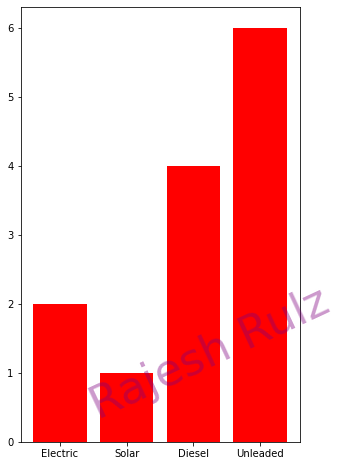

In [12]:
import matplotlib.pyplot as plt
from dataclasses import dataclass,field

@dataclass
class Barchart:
    numbers:list=field(default_factory=list)
    labels:list=field(default_factory=list)
    pos:list=field(default_factory=list)
        
    @property
    def bar_chart_data(self):
        return f"Numbers : {self.numbers} , Labels : {self.labels} , Positions : {self.pos}"
    
    def draw_bar_chart(self):
        fig = plt.figure(figsize=(5,8))
        plt.bar(self.pos,self.numbers,color='red')
        plt.xticks(ticks=self.pos, labels=self.labels)
        
        # watermark
        fig.text(1,0.15, 'Rajesh Rulz', fontsize=45, color='purple', ha='right', va='bottom', alpha=0.4, rotation=25)
        
        #display graph
        plt.show()

my_bar_chart = Barchart([2,1,4,6],['Electric','Solar','Diesel','Unleaded'],list(range(4)))

print(f"{my_bar_chart.bar_chart_data}")

my_bar_chart.draw_bar_chart()


In [19]:
# simple recursion

from typing import List

def my_recursive_sum(num_list:List[int])->int:
    if len(num_list) == 0:
        return 0
    
    return num_list[0]+ my_recursive_sum(num_list[1:])

print(my_recursive_sum([]))
print(my_recursive_sum([1,2,3]))


0
6


In [46]:
# .union() & .intersection() & issubset()

winners = {"John", "Mary"}
players = {"Daisy","John","Bob","Mary"}

print(winners.union(players))

print(players.intersection(winners))

print(f"{players.issubset(winners)} , {winners.issubset(players)}")

{'John', 'Daisy', 'Bob', 'Mary'}
{'John', 'Mary'}
False , True


In [56]:
# Named tuples

from collections import namedtuple

Point = namedtuple("Point", "x y")

print(f"It is {issubclass(Point, tuple)} that Point is a subclass of tuple")

point = Point(2,4)
print(point)
print(point[0] , getattr(point,'y'))

It is True that Point is a subclass of tuple
Point(x=2, y=4)
2 4


In [69]:
# print justification

import random

names = 'Julian Bob Martin Rodolfo'.split()
scores = random.sample(range(1,11), len(names))

for name,score in zip(names, scores):
    print(f"{name} | {score}")

for name,score in zip(names, scores):
    print(f"{name:<20} | {score}")

for name,score in zip(names, scores):
    print(f"{name:>20} | {score}")
    

for name,score in zip(names, scores):
    print(f"{name:^20} | {score}")
    


Julian | 6
Bob | 1
Martin | 5
Rodolfo | 4
Julian               | 6
Bob                  | 1
Martin               | 5
Rodolfo              | 4
              Julian | 6
                 Bob | 1
              Martin | 5
             Rodolfo | 4
       Julian        | 6
        Bob          | 1
       Martin        | 5
      Rodolfo        | 4


In [72]:
# timer decorator

from functools import wraps
from time import time, sleep

def timer(my_func):
    @wraps(my_func)
    def wrapper(*args, **kwargs):
        start = time()
        my_func(*args, **kwargs)
        end = time()

        results = f"Elapsed Time for {my_func.__name__} : {end-start}"

        return results

    return wrapper

@timer
def my_func():
    sleep(2)
    print("Done")


print(my_func())

Done
Elapsed Time for my_func : 2.005199909210205


In [44]:
# Dictionaries - get attributes & methods & try them out

my_dictionary = {'bob': '11','julian':'22','tim':'33','sara':'44'}

print(f"{dir(my_dictionary)}", end='\n\n')
print(f"{[attr for attr in dir(my_dictionary)]}", end='\n\n')
print([attr for attr in dir(my_dictionary) if not attr.startswith('__')])

print(f"Keys : {my_dictionary.keys()}")
print(f"Values : {my_dictionary.values()}")
print(f"Items : {my_dictionary.items()}")
print(f"Get bob : {my_dictionary.get('bob')}")
print(f"Get bob boolean: {my_dictionary.get('bob') is not None}")
print(f"Get bob2 boolean: {my_dictionary.get('bob2') is not None}")
# remove tim with pop
my_dictionary.pop('tim')
print(f"Tim popped : {my_dictionary.items()}")
# pop & retrieve item popped
popped_item = my_dictionary.popitem()
print(f"First item popped : {popped_item}")
# update with new value
my_dictionary.update({'frank':'55'})
print(f"Update with Frank : {my_dictionary}")

# clear everything
my_dictionary.clear()
print(my_dictionary)


['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']

['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', 

In [32]:
import multiprocessing

multiprocessing.cpu_count()

10

# SHORT CIRCUIT

In [18]:
# Short circuiting

# print(1/0 and False) # ZeroDivisionError: division by zero

# This is fine due to shortcircuiting - Python only looks at the right operand of a Boolean operator IF it needs it.
print(False and 1/0)

# strings and ints are always true
print(bool(0))
print(bool("False"))
print(bool(3))

# Python returns the last operand it evalutes
print(6 and 0)
print(0 and 6)
print(3 and 6)
print(6 and 3)
print(0 or 6)
print(6 or 3)

f = lambda x : x%2 and "odd" or "even"
print(f(15))
print(f(20))

False
False
True
True
0
0
6
3
6
6
odd
even


In [19]:
# use walrus operator in f-strings

my_name = "Rajesh"
my_hero = "Major Dutch"

print(f'I am {(me:=my_name)}. {me} hero is {my_hero}. {me} thinks {my_hero} is the greatest')

I am Rajesh. Rajesh hero is Major Dutch. Rajesh thinks Major Dutch is the greatest


In [4]:
tariffId='101055'
my_str='101055,101054,101034'
my_tariffs = tuple(my_str.split(','))

print("Not Found" if tariffId not in my_tariffs else "Found")

Found


In [4]:
myDict={
    1:"yes",
    2:"No"
}
print(myDict)
print(myDict[1])
print(myDict[2])

{1: 'yes', 2: 'No'}
yes
No


In [1]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [2]:
for item in thisdict:
    print(f"{item}")

brand
model
year


In [3]:
for item in thisdict.items():
    print(f"{item}")

('brand', 'Ford')
('model', 'Mustang')
('year', 1964)


In [4]:
for name,value in thisdict.items():
    print(f"{name} --> {value}")

brand --> Ford
model --> Mustang
year --> 1964


In [15]:
for count,(name,value) in enumerate(thisdict.items()):
    print(f"{count+1} --> {name} --> {value}")

1 --> brand --> Ford
2 --> model --> Mustang
3 --> year --> 1964


In [25]:
import json

data={
    "voucherId":"VID001",
    "accNum" : "1234567",
#     "lineno" : "8901234"
    "lineno" : "8901234"
}
jdata=json.dumps(data)
print(f"{data}")
print(f"{jdata}")
# print(f"{jdata.voucherId} - {jdata.accNum} - {jdata.lineno}")

{'voucherId': 'VID001', 'accNum': '1234567', 'lineno': '8901234'}
{"voucherId": "VID001", "accNum": "1234567", "lineno": "8901234"}


In [3]:
in_json={
   "pco_authenticateuipath_url":"https://devuipath.internal.spark.co.nz/api/Account/Authenticate",
   "pco_putmessage_url":"https://devuipath.internal.spark.co.nz/odata/Queues/UiPathODataSvc.AddQueueItem",
   "uploadEmailAttachments_url_v2":"http://mailservice-ramses.dev.ocp.internal.spark.co.nz/api/v2/uploadAttachment",
   "sendEmail_url_v2":"http://mailservice-ramses.dev.ocp.internal.spark.co.nz/api/v2/sendEmail",
   "BidagwP_ORACLEDB":{
      "name":"BidagwP_ORACLEDB",
      "username":"probe_ro",
      "password":"gAAAAABgJDooS17JNyma9hIZ8gfuwb9dkWrb-J9s2z1r5IiFr6sR4U1uqiNKsRX_TuVnRXHyRAjvMmruNxd2AxM9LLvnaqWHGjB55FokvHuAGcS3RyKiTxI=",
      "host":"capobig06",
      "port":1554,
      "service":"BidagwP",
      "lastUpdatedDate":{
         "$date":1612986920658
      }
   },
   "DB":{
      "name":"Automation_MongoDB",
      "username":"admin",
      "password":"gAAAAABf_7rKYQWT7qxxlCmW4Epoa1qooCFWhqZLA_YFjcVfXn-gORbYd1vE1t162H-VkZSSwfvzLVfjbs1uClk_CAjAqObKBQ==",
      "host":"chilaut02.telecom.tcnz.net",
      "port":27017,
      "service":"chilaut02.telecom.tcnz.net",
      "lastUpdatedDate":{
         "$date":1592871914254
      }
   },
   "EDW_DB2DB":{
      "name":"EDW_DB2DB",
      "username":"t966957",
      "password":"gAAAAABgJDonnADgtNOv9bTeVee7B5HFOjpffb6oK4WRpeXTzXvO-umznH0G7cliWVoJi4IxqLePM32LjxfeB-NOMlDF1uvkvA==",
      "host":"PDOAPROD",
      "port":50000,
      "service":"NA",
      "lastUpdatedDate":{
         "$date":1612986919958
      }
   },
   "Automation_MongoDB":{
      "name":"Automation_MongoDB",
      "username":"admin",
      "password":"gAAAAABf_7rKYQWT7qxxlCmW4Epoa1qooCFWhqZLA_YFjcVfXn-gORbYd1vE1t162H-VkZSSwfvzLVfjbs1uClk_CAjAqObKBQ==",
      "host":"chilaut02.telecom.tcnz.net",
      "port":27017,
      "service":"chilaut02.telecom.tcnz.net",
      "lastUpdatedDate":{
         "$date":1592871914254
      }
   },
   "EDWSQL_getresponsibleperson":"select PERSON_RESPONSIBLE from EDWP_D2PM.SAP_WBS_ELEMENTS where WBSE_CODE = ? and Delete_Flag = 'C' order by insert_timestamp desc",
   "BidagwPSQL_getactivitytypecostrate":"select EMP_NUMBER,COST_CENTER,ACTIVITY_TYPE,ZTOTHR from V_EMP_ZFACT where EMP_NUMBER like :tnum and Activity_Type like 'G%' order by EMP_Number",
   "snowsap_uipath_queuename":"SNOW_SAP_YPF_QUEUE",
   "snowsap_uipath_wbsequeuename":"SNOW_SAP_WBSE_QUEUE",
   "pco_uipath_username":"Admin",
   "pco_uipath_password":"MXNRwexx2",
   "pco_uipath_tenancyname":"Development",
   "from_email_id":"automationinbox@spark.co.nz",
   "snowsap_to_email":"Rajesh.Babu@spark.co.nz",
   "snowsap_cc_email":"Rajesh.Babu@spark.co.nz,Sudha.Sachidanandam@spark.co.nz",
   "snowsap_email_template":"SNOW_SAP_WBSE_REPORT",
   "new":"new",
   "automated":"automated",
   "snowsap_day":"00",
   "snowsap_getdata_start_hour":"08",
   "snowsap_getdata_start_minute":"00",
   "snowsap_sendreport_start_hour":"08",
   "snowsap_sendreport_start_minute":"20"
}

print(in_json['snowsap_day'])

00


In [24]:
lineno="123456"
print(lineno[0])
lineno = lineno if lineno[0] == "0" else f"0{lineno}" 
print(lineno)

1
0123456


In [45]:
my_str={None}
print(type(my_str))
if my_str == None :
    print(f"None processing of {my_str}")
else :
    print(f"NOT None processing of {my_str}")

my_str=None
print(type(my_str))
if my_str == None :
    print(f"None processing of {my_str}")
else :
    print(f"NOT None processing of {my_str}")

import json
my_str=json.dumps("None")
print(type(my_str))
if my_str == "None" :
    print(f"None processing of {my_str}")
else :
    print(f"NOT None processing of {my_str}")
    

<class 'set'>
NOT None processing of {None}
<class 'NoneType'>
None processing of None
<class 'str'>
NOT None processing of "None"


In [4]:
num = 42

print(f"Number is {num}")

print(f"If I add 3 to {num}, I get {num + 3 = }")

Number is 42
If I add 3 to 42, I get num + 3 = 45


# Itertools

### cycle

In [10]:
from itertools import cycle
lights = "Red Green Amber".split()
print(lights)
states=cycle(lights)
print(states)
print(next(states))
print(next(states))
print(next(states))
print(next(states))
print(next(states))
print(next(states))

['Red', 'Green', 'Amber']
Red
Green
Amber
Red
Green
Amber


In [5]:
from itertools import chain

my_list = ['foo','bar']
numbers_list = list(range(5))
cmd_list = ['cmd', 'ls -lrt']

print(list(chain(my_list,numbers_list,cmd_list)))

['foo', 'bar', 0, 1, 2, 3, 4, 'cmd', 'ls -lrt']


In [31]:
from itertools import cycle
from string import ascii_uppercase

chars = cycle(ascii_uppercase)
for _ in range(20):
 print([x for x in next(chars)])

['A']
['B']
['C']
['D']
['E']
['F']
['G']
['H']
['I']
['J']
['K']
['L']
['M']
['N']
['O']
['P']
['Q']
['R']
['S']
['T']


In [12]:
list_1 = ['380 Driving Creek Road', ' Coromandel', ' 3506'] 
list_2 = ['Coromandel']
stripped_list=[place.strip(' ') for place in list_1]
print(stripped_list)
[i for i in stripped_list if i in list_2]

['380 Driving Creek Road', 'Coromandel', '3506']


['Coromandel']

### Count

In [214]:
from itertools import count
counter=count(20)
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))


20
21
22
23
24


### accumulate

In [2]:
from itertools import accumulate

sales=[10,20,30,40,50,60,70]
print(accumulate(sales))
print(list(accumulate(sales)))

[10, 30, 60, 100, 150, 210, 280]


### product

In [4]:
# Without product
for i in range(1,5):
    for j in 'ABC':
        print(f"{i}-{j}")

1-A
1-B
1-C
2-A
2-B
2-C
3-A
3-B
3-C
4-A
4-B
4-C


In [5]:
from itertools import product
# With product
for (i,j) in product(range(1,5),'ABC'):
    print(f"{i}-{j}")

1-A
1-B
1-C
2-A
2-B
2-C
3-A
3-B
3-C
4-A
4-B
4-C


### Rock,Paper,Scissors with itertools

In [6]:
from itertools import product
rolls = ['rock','paper','scissors','lizard','spock']
product(rolls, repeat=2)
list(product(rolls, repeat=2))


[('rock', 'rock'),
 ('rock', 'paper'),
 ('rock', 'scissors'),
 ('rock', 'lizard'),
 ('rock', 'spock'),
 ('paper', 'rock'),
 ('paper', 'paper'),
 ('paper', 'scissors'),
 ('paper', 'lizard'),
 ('paper', 'spock'),
 ('scissors', 'rock'),
 ('scissors', 'paper'),
 ('scissors', 'scissors'),
 ('scissors', 'lizard'),
 ('scissors', 'spock'),
 ('lizard', 'rock'),
 ('lizard', 'paper'),
 ('lizard', 'scissors'),
 ('lizard', 'lizard'),
 ('lizard', 'spock'),
 ('spock', 'rock'),
 ('spock', 'paper'),
 ('spock', 'scissors'),
 ('spock', 'lizard'),
 ('spock', 'spock')]

### itertools - groupby

In [16]:
from itertools import groupby
import re

tax_ids = [
    'DE123456789',
    'ATU99999999',
    'ATU00000000',
    'BG999999999',
    'IT12345678900',
    'DE987654321'
]

grouped_tax_ids = groupby(
    tax_ids,
    key=lambda tax_id: re.match(r'[A-Z]{2}', tax_id).group()
)

for country, country_tax_ids in grouped_tax_ids:
    print(f"{country} - {list(country_tax_ids)}")

DE - ['DE123456789']
AT - ['ATU99999999', 'ATU00000000']
BG - ['BG999999999']
IT - ['IT12345678900']
DE - ['DE987654321']


### takewhile
itertools.takewhile takes items from an iterable until a specified condition becomes false. 

Here this is the character "c" based on the predicate we defined (test_func).

In [21]:
from itertools import takewhile

s = "1a2b3c4d5e6f"

def test_func(ch):
    return ch.isdigit() or ch in "abc"

print(f"{list(takewhile(test_func, s))}")

['1', 'a', '2', 'b', '3', 'c', '4']


#### Exception Handling

In [12]:
import sys

try :
    print(sys.platform)
    assert('linux' in sys.platform),"This code runs on linux only."
except Exception as err:
    print(err)

win32
This code runs on linux only.


In [15]:
try :
    with open('file.log') as my_file:
        read_data = my_file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)

[Errno 2] No such file or directory: 'file.log'


In [27]:
try :
   raise Exception("Thi is a test")
except Exception as e:
    if "This is a test" in getattr(e, 'message', repr(e)) :
        print(e)
    else :
        print("Toodle OO!")

Toodle OO!


In [62]:
import sys

try :
    print(sys.platform)
    assert('win' in sys.platform), "This code runs in windows only"
    
    print("In God We Trust! All others must pay in cash")
except AssertionError as err:
    print(err)
else :
    print("In God we Trust!")

win32
In God We Trust! All others must pay in cash
In God we Trust!


In [64]:
import sys

try :
    print(sys.platform)
    assert('win' in sys.platform), "This code runs in windows only"
    print("Got past the assertion in try")
except AssertionError as err:
    print(err)
else:
    try : 
        with open('filwe.log') as myfile:
            read_data = myfile.read()
    except FileNotFoundError as fnf_err:
        print(fnf_err)
finally:
    print("Cleaning up finally")
        

win32
Got past the assertion in try
[Errno 2] No such file or directory: 'filwe.log'
Cleaning up finally


In [67]:
import logging

def get_number():
    return int('foo')

try:
    x=get_number()
    print(x)
except Exception as err:
    logging.error(err)
    logging.exception('Caught an error')

ERROR:root:invalid literal for int() with base 10: 'foo'
ERROR:root:Caught an error
Traceback (most recent call last):
  File "<ipython-input-67-32d4ee31e6b0>", line 7, in <module>
    x=get_number()
  File "<ipython-input-67-32d4ee31e6b0>", line 4, in get_number
    return int('foo')
ValueError: invalid literal for int() with base 10: 'foo'


In [75]:
import traceback

def get_number():
    return int('foo')

    
def log_traceback(err):
    tb_lines = traceback.format_exception(err.__class__, err, err.__traceback__)
    tb_text = ''.join(tb_lines)
    
#     exception_logger.log(tb_text)
    print(tb_text)

try :
    x=get_number()
    print(x)
except Exception as err:
    log_traceback(err)

Traceback (most recent call last):
  File "<ipython-input-75-e384d93dcdad>", line 15, in <module>
    x=get_number()
  File "<ipython-input-75-e384d93dcdad>", line 4, in get_number
    return int('foo')
ValueError: invalid literal for int() with base 10: 'foo'



### NamedTuple
##### https://realpython.com/python-namedtuple/

#### Simple point

In [43]:
from collections import namedtuple

Point = namedtuple("Point", "x y")

point = Point(2,4)

print(point)
print(point.x)
print(point.y)

print(point[0])

Point(x=2, y=4)
2
4
2


#### People & children

In [111]:
from collections import namedtuple

Person = namedtuple("Person", "name children")

john = Person("John Doe", ['Jimmy Doe', 'Johnny Doe'])

print(john)

print(*john)
print(john.children)
john.children.append('Tina Doe')
print(john.children)
print(john.children[1])

Person(name='John Doe', children=['Jimmy Doe', 'Johnny Doe'])
John Doe ['Jimmy Doe', 'Johnny Doe']
['Jimmy Doe', 'Johnny Doe']
['Jimmy Doe', 'Johnny Doe', 'Tina Doe']
Johnny Doe


#### ways to pass typename & field_names

In [57]:
from collections import namedtuple

# A list of strings for the field names
Point = namedtuple("Point", ["x", "y"])
print(Point)

print(Point(2, 4))


# A string with comma-separated field names
Point = namedtuple("Point", "x, y")
print(Point)

print(Point(4, 8))


# A generator expression for the field names
Point = namedtuple("Point", (field for field in "xy"))
print(Point)

print(Point(8, 16))


<class '__main__.Point'>
Point(x=2, y=4)
<class '__main__.Point'>
Point(x=4, y=8)
<class '__main__.Point'>
Point(x=8, y=16)


#### Dont use unordered iteratbles for field_names

In [61]:
from collections import namedtuple

Point = namedtuple("Point",{"x","y"})

my_point = Point(2,3)
print(my_point)

Point(y=2, x=3)


#### Dictionary can be used to initialise field_name values

In [67]:
from collections import namedtuple

Point = namedtuple("Point", "x,y")

points_dict = {"x":2, "y":4}

my_point = Point(**points_dict)
print(my_point)



Point(x=2, y=4)


##### the namedtuple() factory function also takes the following optional arguments:
rename
defaults
module

##### defaults

In [71]:
from collections import namedtuple

Profile = namedtuple("Profile","name, grade, lang", defaults=["Junior", "Python"])

john = Profile("John")
print(john)
john = Profile("")
print(john)


Profile(name='John', grade='Junior', lang='Python')
Profile(name='', grade='Junior', lang='Python')


##### module - this is used for pickling if necessary

In [75]:
from collections import namedtuple

Person = namedtuple("Person", "name age job", module="customperson")

john = Person("John","12", "Engineer")

print(john)
print(john.__module__)

Person(name='John', age='12', job='Engineer')
customperson


##### rename

In [88]:
from collections import namedtuple

def get_column_names()-> str:
    return "name, _age, job"

# This wil return valueError: Field names cannot start with an underscore: '_age'
# Person = namedtuple("Person", get_column_names())
Person = namedtuple("Person", get_column_names(), rename=True)
john = Person("John Doe", "30", "Engineer")
print(john)



Person(name='John Doe', _1='30', job='Engineer')


### Additional features

#### Creating namedtuple Instances From Iterables

In [91]:
from collections import namedtuple

Person = namedtuple("Person", "name age job")

# Will give TypeError: <lambda>() missing 2 required positional arguments: 'age' and 'job'
# john = Person(['John Doe', '12', 'Engineer'])

john = Person._make(['John Doe', '12', 'Engineer'])
print(john)

Person(name='John Doe', age='12', job='Engineer')


##### Converting namedtuple Instances Into Dictionaries

In [94]:
from collections import namedtuple

Person = namedtuple("Person", "name age job")

john = Person._make(['John Doe', '12', 'Engineer'])
print(john._asdict)

jane = Person._make(['Jane Doe', '10', 'Product Owner'])
print(john._asdict())

<bound method Person._asdict of Person(name='John Doe', age='12', job='Engineer')>
{'name': 'John Doe', 'age': '12', 'job': 'Engineer'}


##### Replacing Fields in Existing namedtuple Instances

In [96]:
from collections import namedtuple

Person = namedtuple("Person", "name age job")

john = Person._make(['John Doe', '12', 'Engineer'])
print(john)
john = john._replace(age=35)
print(john)

Person(name='John Doe', age='12', job='Engineer')
Person(name='John Doe', age=35, job='Engineer')


##### Create new namedtuple from existing ones

In [101]:
from collections import namedtuple

Person = namedtuple("Person","name age height")

ExtendedPerson = namedtuple("ExtendedPerson", [*Person._fields, "weight"])

jane = ExtendedPerson("Jane Doe", 30, 152, 60)
print(jane)
print(jane.age)

ExtendedPerson(name='Jane Doe', age=30, height=152, weight=60)
30


##### ._fields to iterate over the fields and the values in a given namedtuple instance using Python’s zip()

In [102]:
from collections import namedtuple

Person = namedtuple("Person", "name age height weight")
jane = Person("Jane", 26, 1.75, 67)
for field, value in zip(jane._fields, jane):
    print(field, "->", value)

name -> Jane
age -> 26
height -> 1.75
weight -> 67


In [103]:
from collections import namedtuple

Person = namedtuple(
    "Person",
    "name age height weight country",
    defaults=["Canada"]
)

Person._field_defaults

{'country': 'Canada'}

##### Pythonic code using namedtuple - Clarity of return arguments

In [106]:
print(divmod(8,4))


from collections import namedtuple

def custom_divmod(a, b):
    DivMod = namedtuple("DivMod", "quotient remainder")
    return DivMod(*divmod(a, b))


print(custom_divmod(8, 4))




(2, 0)
DivMod(quotient=2, remainder=0)


##### Pythonic code using namedtuple - Reducing the Number of Arguments to Functions

In [107]:
User = namedtuple("User", "username client_name plan")
user = User("john", "John Doe", "Premium")

def create_user(db, user):
    db.add_user(user.username)
    db.complete_user_profile(
        user.username,
        user.client_name,
        user.plan
    )

## Miscellaneous

In [36]:
null = None

# Legacy comes first
response = {"header":[{"ACCNUM":"733546972","BBSUBIDD":null,"CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Spark Product","OFFERID":"sparkproductSPO","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Legacy","PRODUCTID":"1-2HKGYIPB","PROD_CD":"Product","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKGYIPB","SERVICETYPE":null,"VIPDATAPACK":null},{"ACCNUM":"733546972","BBSUBIDD":"1-2HIW8ASV","CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Unplan Netflix Fibre 100 with Landline Open","OFFERID":"bvbundle050900","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Fibre","PRODUCTID":"1-2HIW8ASU","PROD_CD":"Promotion","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKIKHWU","SERVICETYPE":null,"VIPDATAPACK":null}],"headercount":2}
index = int([i for (i,item) in enumerate(response['header']) if item['PRODTYPE'] != "Legacy"][0])
print(index)

# Legacy comes second
response = {"header":[{"ACCNUM":"733546972","BBSUBIDD":"1-2HIW8ASV","CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Unplan Netflix Fibre 100 with Landline Open","OFFERID":"bvbundle050900","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Fibre","PRODUCTID":"1-2HIW8ASU","PROD_CD":"Promotion","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKIKHWU","SERVICETYPE":null,"VIPDATAPACK":null}, {"ACCNUM":"733546972","BBSUBIDD":null,"CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Spark Product","OFFERID":"sparkproductSPO","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Legacy","PRODUCTID":"1-2HKGYIPB","PROD_CD":"Product","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKGYIPB","SERVICETYPE":null,"VIPDATAPACK":null}],"headercount":2}
index = int([i for (i,item) in enumerate(response['header']) if item['PRODTYPE'] != "Legacy"][0])
print(index)

# Legacy comes first two, three records
response = {"header":[{"ACCNUM":"733546972","BBSUBIDD":null,"CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Spark Product","OFFERID":"sparkproductSPO","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Legacy","PRODUCTID":"1-2HKGYIPB","PROD_CD":"Product","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKGYIPB","SERVICETYPE":null,"VIPDATAPACK":null},{"ACCNUM":"733546972","BBSUBIDD":null,"CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Spark Product","OFFERID":"sparkproductSPO","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Legacy","PRODUCTID":"1-2HKGYIPB","PROD_CD":"Product","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKGYIPB","SERVICETYPE":null,"VIPDATAPACK":null}, {"ACCNUM":"733546972","BBSUBIDD":"1-2HIW8ASV","CHARGEAGGRID":"063465989","CUSNUM":"733546956","EMAILID":"irene.avison@gmail.com","NAME":"Unplan Netflix Fibre 100 with Landline Open","OFFERID":"bvbundle050900","OPENORDER":0,"PAR_ASSET_ID":null,"PRODTYPE":"Fibre","PRODUCTID":"1-2HIW8ASU","PROD_CD":"Promotion","PROM_INTEG_ID":null,"ROOT_ASSET_ID":"1-2HKIKHWU","SERVICETYPE":null,"VIPDATAPACK":null}],"headercount":2}
index = int([i for (i,item) in enumerate(response['header']) if item['PRODTYPE'] != "Legacy"][0])
print(index)




1
0
2


In [26]:
import uuid

f"AUTO-SSCREDIT-{str(uuid.uuid4().hex[:8])}"

'AUTO-SSCREDIT-8f78e50c'

In [22]:
def my_func()-> None:
    print("In God We Trust")
    
my_func.__name__

'my_func'

In [6]:
my_list = ['In', 'God', 'we','Trust']

list(enumerate(my_list))

[(0, 'In'), (1, 'God'), (2, 'we'), (3, 'Trust')]

### Intern
#### https://www.youtube.com/watch?v=0Om2gYU6clE

In [62]:
x = 5
print(f"x : {hex(id(x))}")
y = x
print(f"y : {hex(id(y))}")
print(f"== : {x==y}")
print(f"is : {x is y}")

x = 257
print(f"x : {hex(id(x))}")
y = x
print(f"y : {hex(id(y))}")
print(f"== : {x==y}")
print(f"is : {x is y}")


x = 6
print(f"x : {hex(id(x))} ; y : {hex(id(y))}")
print(f"== : {x==y}")
print(f"is : {x is y}")

x = [1,2,3]
y = x
print(f"x:{hex(id(x))}   y:{hex(id(y))}")
y.append(4)
print(f"x:{hex(id(x))}   y:{hex(id(y))}")

x = [1,2,3]
y = [1,2,3]
print(f"== : {x == y}")
print(f"is : {x is y}")


x : 0x7ff49c99c9b0
y : 0x7ff49c99c9b0
== : True
is : True
x : 0x7ff49a6ecd50
y : 0x7ff49a6ecd50
== : True
is : True
x : 0x7ff49c99c9d0 ; y : 0x7ff49a6ecd50
== : False
is : False
x:0x7ff49850d580   y:0x7ff49850d580
x:0x7ff49850d580   y:0x7ff49850d580
== : True
is : False


In [69]:
x = 1,2, [1,2]
print(type(x))
print(type(x[0]))
print(type(x[2]))
x[2].append(3)
print(x)

x[2] = x[2]+[4,5]
print(x)

<class 'tuple'>
<class 'int'>
<class 'list'>
(1, 2, [1, 2, 3])


TypeError: 'tuple' object does not support item assignment

In [43]:
import json

my_dict={"name": "Peter", "age": 42}
print(f"Dictionary : {my_dict}")
my_json = json.dumps(my_dict)
print(f"JSON using dumps : {my_json}")
print(f"Dict of JSON using loads : {json.loads(my_json)}")

Dictionary : {'name': 'Peter', 'age': 42}
JSON using dumps : {"name": "Peter", "age": 42}
Dict of JSON using loads : {'name': 'Peter', 'age': 42}


In [39]:
from http import HTTPStatus


print(HTTPStatus(418).phrase)
print(HTTPStatus(418).description)

I'm a Teapot
Server refuses to brew coffee because it is a teapot.


In [23]:
import sys

print(sys.implementation.name)

print(sys.implementation.version)

cpython
sys.version_info(major=3, minor=9, micro=5, releaselevel='final', serial=0)


In [27]:
mys_str='andy samberg.jpg'
mys_str.split(' ')[0]

'andy'

In [35]:
my_dict={'and y':'imag1', 'meli  ssa':'image2','jo e':'image3'}

for win_name, image_to_display in my_dict.items():
    print(f"Window name : {win_name}")
    print(f"Imread image : {image_to_display}")

Window name : and y
Imread image : imag1
Window name : meli  ssa
Imread image : image2
Window name : jo e
Imread image : image3


## Easter Eggs

In [1]:
import this
# source coed is interesting as well : https://github.com/python/cpython/blob/main/Lib/this.py

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [5]:
import antigravity # works only from REPL

In [6]:
import __hello__

Hello world!


In [7]:
from __future__ import braces

SyntaxError: not a chance (3905450354.py, line 1)

In [12]:
print(hash(float('inf')))

print(hash(float('nan')))

314159
0


In [19]:
from __future__ import barry_as_FLUFL

print(0 != 1)
# print(0 <> 1)


SyntaxError: with Barry as BDFL, use '<>' instead of '!=' (1891218216.py, line 3)

In [20]:
from collections import defaultdict

data = """
Tim,ID
Sara,BR
Chris,RU
Mario,PL
Paul,CN
"""
countries=defaultdict(list)

print(data)

for line in data.splitlines():
    print(line)
#     name, country = line.split(',')
#     countries[country_code].append(name)

print(countries)


Tim,ID
Sara,BR
Chris,RU
Mario,PL
Paul,CN


Tim,ID
Sara,BR
Chris,RU
Mario,PL
Paul,CN
defaultdict(<class 'list'>, {})


In [8]:
from operator import itemgetter

days=['mon','tue','wed','thu','fri','sat','sun']

f=itemgetter(0,6)

print(f)
print(f(days))

my_str="InGodWeTrust!"
print(f(my_str))

workouts={
    'mon':'chest',
    'tue' : 'biceps',
    'wed':'legs',
    'thu':'arms',
    'fri':'ears',
    'sat':'cat',
    'sun':'dog'
}
print(itemgetter('mon','fri','sun')(workouts))

operator.itemgetter(0, 6)
('mon', 'sun')
('I', 'e')
('chest', 'ears', 'dog')


In [10]:
from string import Template

s = Template("In $who We Trust. All Others Must Pay in $what")

print(s.substitute(who="God", what="Cash"))
print(s.safe_substitute(who="God"))



# This will raise KeyError
# s.substitute(who="God")
# print(s)



In God We Trust. All Others Must Pay in Cash
In God We Trust. All Others Must Pay in $what


#### Generate ordinal numbers

In [10]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])


print([ordinal(n) for n in range(1,11)])


['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']


In [13]:
suf = lambda n: "%d%s"%(n,{1:"st",2:"nd",3:"rd"}.get(n if n<20 else n%10,"th"))

print([suf(n) for n in range(1,32)])

['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th', '25th', '26th', '27th', '28th', '29th', '30th', '31st']


In [14]:
def make_ordinal(n):
    '''
    Convert an integer into its ordinal representation::

        make_ordinal(0)   => '0th'
        make_ordinal(3)   => '3rd'
        make_ordinal(122) => '122nd'
        make_ordinal(213) => '213th'
    '''
    n = int(n)
    suffix = ['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]
    if 11 <= (n % 100) <= 13:
        suffix = 'th'
    return str(n) + suffix

print([make_ordinal(n) for n in range(1,30)])

['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th', '25th', '26th', '27th', '28th', '29th']


In [18]:
print([min(n%10,4) for n in range(1,11)])

[1, 2, 3, 4, 4, 4, 4, 4, 4, 0]


#### Create recurring dates

In [29]:
from dateutil.rrule import rrule, WEEKLY, SU, TU, TH
from dateutil.parser import parse
from pprint import pprint as pp

dates = rrule(
    WEEKLY,
    count=10,
    wkst=SU,
    byweekday=(TU,TH),
    dtstart=parse("20210705T160000")
)

pp(list(dates))

dates_fmt = [date_fmt.ctime() for date_fmt in list(dates)]
pp(dates_fmt)                                                   

[datetime.datetime(2021, 7, 6, 16, 0),
 datetime.datetime(2021, 7, 8, 16, 0),
 datetime.datetime(2021, 7, 13, 16, 0),
 datetime.datetime(2021, 7, 15, 16, 0),
 datetime.datetime(2021, 7, 20, 16, 0),
 datetime.datetime(2021, 7, 22, 16, 0),
 datetime.datetime(2021, 7, 27, 16, 0),
 datetime.datetime(2021, 7, 29, 16, 0),
 datetime.datetime(2021, 8, 3, 16, 0),
 datetime.datetime(2021, 8, 5, 16, 0)]
['Tue Jul  6 16:00:00 2021',
 'Thu Jul  8 16:00:00 2021',
 'Tue Jul 13 16:00:00 2021',
 'Thu Jul 15 16:00:00 2021',
 'Tue Jul 20 16:00:00 2021',
 'Thu Jul 22 16:00:00 2021',
 'Tue Jul 27 16:00:00 2021',
 'Thu Jul 29 16:00:00 2021',
 'Tue Aug  3 16:00:00 2021',
 'Thu Aug  5 16:00:00 2021']


#### re.sub example

In [35]:
import re
my_str = "from random inport sample"
print({re.sub("[aeiou]","*",my_str)})

print({re.subn("[aeiou]","*",my_str)})


{'fr*m r*nd*m *np*rt s*mpl*'}
{('fr*m r*nd*m *np*rt s*mpl*', 7)}


### sample generation

In [39]:
from random import sample

numbers = range(10,100,2)

for _ in range(3):
    print(sample(numbers,5))

[50, 40, 34, 30, 28]
[96, 52, 34, 80, 64]
[12, 16, 64, 86, 96]


#### urlretrieve to download file

In [22]:
import os
from pathlib import Path
from urllib.request import urlretrieve

tmp=Path(os.getenv("TMP","/tmp"))
print(tmp)
temp_file=tmp / "dirnames"
print(temp_file)
urlretrieve("https://filesamples.com/samples/document/txt/sample3.txt")

C:\Users\T810235\AppData\Local\Temp
C:\Users\T810235\AppData\Local\Temp\dirnames


HTTPError: HTTP Error 403: Forbidden

### Duplicate classes

In [10]:
#Define class the first time
class MyClass:
    my_name="Rajesh"

# Instantiate and print class variable
my_obj_1 = MyClass()
print(f"Object name : {my_obj_1.my_name}")

#Define class the second time with same name
class MyClass():
    my_name="Pawan"

# Instantiate and print class variable
my_obj_1 = MyClass()
print(f"Object name after second class definition with same name : {my_obj_1.my_name}")


Object name : Rajesh
Object name after second class definition with same name : Pawan


### Create random Keys

In [8]:
import random
import string

chars = string.ascii_lowercase + string.digits
print(chars)

for _ in range(4):
    print(''.join(random.sample(chars,20)))

abcdefghijklmnopqrstuvwxyz0123456789
sicd2jqz60l5t9xghfak
eqy34bo1ghrz90x7dvp8
p7jfiba9ky5t2l0uzds4
q97ws52jyegcoaz8u4bn


### Method Resolution Order (MRO)

In [15]:
from collections import UserList
from pprint import pprint as pp
class MyList(UserList):
    pass

pp(MyList.__mro__)

pp(MyList.__dict__)


(<class '__main__.MyList'>,
 <class 'collections.UserList'>,
 <class 'collections.abc.MutableSequence'>,
 <class 'collections.abc.Sequence'>,
 <class 'collections.abc.Reversible'>,
 <class 'collections.abc.Collection'>,
 <class 'collections.abc.Sized'>,
 <class 'collections.abc.Iterable'>,
 <class 'collections.abc.Container'>,
 <class 'object'>)
mappingproxy({'__abstractmethods__': frozenset(),
              '__doc__': None,
              '__module__': '__main__',
              '_abc_impl': <_abc_data object at 0x0000021936DF07B0>})


### isinstance()

In [27]:
from collections import UserList
from collections.abc import Sequence
from collections.abc import Reversible

class MyList(UserList):
    pass

my_list=MyList()

print(type(my_list) is MyList)
print(type(my_list) is Sequence)
print(type(my_list) is object)


print(isinstance(my_list,MyList))
print(isinstance(my_list, Sequence))
print(isinstance(my_list, Reversible))
print(isinstance(my_list, object))

True
False
False
True
True
True
True


### Timer & reader for feeds

- retrieve, store, and manage Atom, RSS, and JSON feeds
- mark entries as read or important
- add tags and metadata to feeds
- filter feeds and articles
- full-text search articles

In [4]:
pip install reader

You should consider upgrading via the 'c:\rajesh\jupyter\venv\scripts\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for sgmllib3k, since package 'wheel' is not installed.
    Running setup.py install for sgmllib3k: started
    Running setup.py install for sgmllib3k: finished with status 'done'


In [11]:
import time
from reader import Reader 

tic = time.perf_counter()
# time.sleep(4)
tutorial = Reader.feed.get_article(0)
toc = time.perf_counter()
print(f"Time taken : {toc-tic}")

AttributeError: type object 'Reader' has no attribute 'feed'

#### NamedTuple from typing
####### This isnt working 

In [85]:
from typing import NamedTuple

class Karma(NamedTuple):
    giver:str
    receiver: str
    score: int

myKarma=Karma('Bob', 'Julian', 10)

myKarma=Karma('Bob', 'Julian', 'rty')


#### Force use of function arguments

In [46]:
import inspect
import sys

def divide_numbers(*, numerator, denominator):
    try:
        return (int(numerator)/int(denominator))
    except:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        print(f"{inspect.stack()[0][3]} in line {exc_tb.tb_lineno} encountered exception {exc_type}")
        
print(divide_numbers(numerator=2,denominator=1))
print(divide_numbers(numerator=2,denominator=0))
print(divide_numbers(denominator=2,numerator=1))
print(divide_numbers(foo='bar',denominator=2,numerator=1))

2.0
divide_numbers in line 6 encountered exception <class 'ZeroDivisionError'>
None
0.5


TypeError: divide_numbers() got an unexpected keyword argument 'foo'

### zip - use as transpose

In [32]:
my_list=[[1,2,3],[4,5,6],[7,8,9]]
print(my_list)
print(list(zip(*my_list)))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


#### zip - loop over a sequence twice comparing the current item with the previous one

In [3]:
d = dict(zip(range(1,4),'abc'))
print(d)
# Only keys
print(*d)
# With seperator
print(*d, sep='|')

{1: 'a', 2: 'b', 3: 'c'}
1 2 3
1|2|3


In [7]:
sales=[1,3,6,10,15,25,38,41,100]
for yesterday,today in zip(sales,sales[1:]):
    print(f"Today - Yesterday = {today-yesterday}")

Today - Yesterday = 2
Today - Yesterday = 3
Today - Yesterday = 4
Today - Yesterday = 5
Today - Yesterday = 10
Today - Yesterday = 13
Today - Yesterday = 3
Today - Yesterday = 59


### zip - Extract keys

In [66]:
weekly_changes = {
    '2021-22':2,
    '2021-16':3,
    '2021-14':4
}
weekly_changes.items()
# list(zip(*weekly_changes.items()))
dates,numbers=zip(*weekly_changes.items())
print(dates)
print(numbers)

('2021-22', '2021-16', '2021-14')
(2, 3, 4)


### Json 2 HTML
##### https://pypi.org/project/json2html/

In [17]:
pip install json2html


Using legacy 'setup.py install' for json2html, since package 'wheel' is not installed.
    Running setup.py install for json2html: started
    Running setup.py install for json2html: finished with status 'done'


In [2]:
from json2html import *
input = {
        "name": "json2html",
        "description": "Converts JSON to HTML tabular representation"
}
data_table = json2html.convert(json = input)
print(data_table)

In [4]:
from json2html import *
input = {
        "sample": [{
                "a":1, "b":2, "c":3
        }, {
                "a":5, "b":6, "c":7
        }]
}
data_table = json2html.convert(json = input)
print(data_table)

<table border="1"><tr><th>sample</th><td><table border="1"><thead><tr><th>a</th><th>b</th><th>c</th></tr></thead><tbody><tr><td>1</td><td>2</td><td>3</td></tr><tr><td>5</td><td>6</td><td>7</td></tr></tbody></table></td></tr></table>


In [14]:
from json2html import *
input = [{
                "ORDERNO":"1-11111", "ORDERCREATED":"2021-04-24", "ORDERSTATUS":"Complete", "AIRPOD_USER_LOGON":"T810235"
        }, {
                "ORDERNO":"1-11113", "ORDERCREATED":"2021-04-23", "ORDERSTATUS":"Complete", "AIRPOD_USER_LOGON":"T811235"
        }, {
                "ORDERNO":"1-11115", "ORDERCREATED":"2021-04-22", "ORDERSTATUS":"Complete", "AIRPOD_USER_LOGON":"T812235"
        }]

data_table_tmp = json2html.convert(json = input)
data_table = data_table_tmp.replace("\"","'")
print(data_table)

<table border='1'><thead><tr><th>ORDERNO</th><th>ORDERCREATED</th><th>ORDERSTATUS</th><th>AIRPOD_USER_LOGON</th></tr></thead><tbody><tr><td>1-11111</td><td>2021-04-24</td><td>Complete</td><td>T810235</td></tr><tr><td>1-11113</td><td>2021-04-23</td><td>Complete</td><td>T811235</td></tr><tr><td>1-11115</td><td>2021-04-22</td><td>Complete</td><td>T812235</td></tr></tbody></table>


## Camelot

In [13]:
# python -m pip install --upgrade pip    ## DO THIS ON CMD

In [14]:
pip --version

pip 21.0.1 from c:\rajesh\jupyter\venv\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "camelot-py[cv]"


In [8]:
import ctypes
from ctypes.util import find_library
print(find_library("gs"))
print(find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll"))))

None
None


In [13]:
import camelot

# Import table from foo.pdf
tables = camelot.read_pdf('C:\\rajesh\\python3TRG\\jupyter\\myWork\\data\\foo.pdf',flavor='stream')
print(tables)
print(tables[0])
print(tables[0].parsing_report)

# Write to file : to_csv, to_json, to_excel, to_html
tables[0].to_json('C:\\rajesh\\python3TRG\\jupyter\\myWork\\data\\foo.json')

# Export to file & compress : f= csv, json, excel, html
tables.export('C:\\rajesh\\python3TRG\\jupyter\\myWork\\data\\foo.xlsx', f='excel', compress=True) 

# Dataframe
tables[0].df

<TableList n=1>
<Table shape=(12, 7)>
{'accuracy': 95.87, 'whitespace': 38.1, 'order': 1, 'page': 1}


,0,1,2,3,4,5,6
0,reducing the number of stops in high KI cycles...,,,,,,
1,,Table 2-1. Simulated fuel savings from isolate...,,,,,
2,,,,,,Percent Fuel Savings,
3,Cycle,KI,Distance,,,,
4,,,,Improved,Decreased,Eliminate,Decreased
5,Name,(1/km),(mi),,,,
6,,,,Speed,Accel,Stops,Idle
7,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
8,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
9,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%


# Comprehension : List & Lambda

Lambda Function : <br>
A lambda function is a small anonymous function. <br>
A lambda function can take any number of arguments, but can only have one expression. <br>
Syntax : lambda arguments : expression<br>
<br>
Filter : <br>
The filter() method constructs an iterator from elements of an iterable for which a function returns true.<br>
Syntax :<br>
filter(function, iterable)

In [24]:
languages = ['Python','Java','Perl','C++','Ruby','Javascript']

# Use Lambda & Filter
x=lambda lang : len(lang)
print(x(languages))

p_only=filter(lambda lang :lang.startswith('P') , languages)
print(p_only)

p_only = list(filter(lambda lang :lang.startswith('P') , languages))
print(p_only)

# Use list comprehension
p_only = [lang for lang in languages]
print(p_only)
p_only = [lang for lang in languages if lang.startswith('P')]
print(p_only)

6
['Python', 'Perl']
['Python', 'Java', 'Perl', 'C++', 'Ruby', 'Javascript']
['Python', 'Perl']


### Dict comprehension + Reversal of keys & values


In [38]:
belts = {
    10 : "white",
    50: "yellow",
    100: "orange",
    150: "green",
    200 : "blue"
}

print({belt: score for score, belt in belts.items()})

{'white': 10, 'yellow': 50, 'orange': 100, 'green': 150, 'blue': 200}


#### Python to log into a PHP website
##### https://linuxhint.com/logging_into_websites_python/

In [22]:
pip install requests

SyntaxError: invalid syntax (<ipython-input-22-743aa356f9d0>, line 2)

In [23]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [44]:
import requests
from bs4 import BeautifulSoup

login_url='https://parentportal.northcote.school.nz/index.php'
home_url='https://parentportal.northcote.school.nz/index.php/b89c3a92d522e69c9bfcf869e98e63c7/0db58d1735f62e8208d7ba8597b4d989'
protected_url = 'https://parentportal.northcote.school.nz/index.php/home'
login_data = {'username':'20035','password':'berGen2a'}

try :
    # Get session 
    with requests.Session() as request_session :
        # Get token
        login_page = request_session.get(login_url)
        bs4_login = bs(login_page.content, "html.parser")
#         token = bs4_login.find("div",{"class":"card card-body pb-0"})["data-kd64eef73261c8d328f3073bd1f35c617"]
        token = bs4_login.find("div",{"class":"card card-body pb-0"})
        print(token)
#         login_data['kd64eef73261c8d328f3073bd1f35c617'] = token
        # construct cookie
#         request_cookie = {
#             "_ga":"GA1.3.1216223358.1618211006",
#             "AzureAppProxyAnalyticCookie_017a2f2a-2df6-46ab-8eee-4a6fefa13b91_1.3":"3|9j1Dlkp8T+TfXOPSQ/bBgre/CThV9rc+lrcZO/6Y2uFxJpCT16s4hQAN4FlvaeorMaKcNcJzJVpMExtDRtMpQyVHjIuEba0AsKvxmqTblb9lh2KHxjXXxlgY3wVPU+8ZNRBQCE/8cjuk2t/vpG1UAA==",
#             "csrf_kamar_cn":"76252ba2137506d7f99e7749b3214063"
#         }
#         request_cookie['kamar_session'] = token
#         print(login_data)
#         prepare_request = requests.Request('POST',home_url,data=login_data)
#         prepared_request = prepare_request.prepare()
#         print(f"Method : {prepared_request.method} URL: {prepared_request.url} Header : {prepared_request.headers}")
        # POST to login
#         login_response=request_session.post(home_url,login_data)
#         print(login_response.content)
#         print(login_response.cookies)
#         home_page=request_session.get(protected_url,cookies=request_cookie)
#         print(home_page.content)
        
        
except Exception as error:
    print(error)
    raise error



<div class="card card-body pb-0" data-k1317129bfef8a691ecf58be3fa61139d="25d74ab0c9868f79c04b713657a4c132" id="auth" style="opacity:0.2">
<div class="form-group">
<label for="login-username">Username: <span class="text-danger">*</span></label>
<input class="form-control" id="login-username" name="username" placeholder="Username (Required)" required="" type="text" value=""/>
</div>
<div class="form-group">
<label for="login-password">Password: <span class="text-danger">*</span></label>
<div class="input-group password-group mb-0">
<input class="form-control" id="login-password" name="password" placeholder="Password (Required)" required="" type="password"/>
</div>
</div>
</div>


## Faker
#### https://www.geeksforgeeks.org/python-faker-library/

In [45]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [16]:
dir(fake)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_factories',
 '_factory_map',
 '_locales',
 '_map_provider_method',
 '_select_factory',
 '_unique_proxy',
 '_weights',
 'add_provider',
 'address',
 'administrative_unit',
 'am_pm',
 'android_platform_token',
 'ascii_company_email',
 'ascii_email',
 'ascii_free_email',
 'ascii_safe_email',
 'bank_country',
 'bban',
 'binary',
 'boolean',
 'bothify',
 'bs',
 'building_number',
 'cache_pattern',
 'catch_phrase',
 'century',
 'chrome',
 'city',
 'city_prefix',
 'city_suffix',
 'color',
 'color_name',
 'company',
 'company_email',
 'company_suffix',
 'coordinate',
 'country',
 'country_calling

#### Common Examples

In [19]:
from faker import Faker 

fake = Faker()

print(f"Hi ! {fake.name()} from {fake.country()} living at {fake.address()} can be contacted on {fake.email()}")
print(f"His home page is {fake.url()} and his location is {fake.latitude()}, {fake.longitude()})")
print( f"He says {fake.text()}")


Hi ! Elizabeth Wilson from Poland living at 72391 Paula Isle Suite 316
North Amber, CO 77763 can be contacted on paulmurray@white.com
His home page is http://brown-howell.org/ and his location is -87.377223, -63.565758)
He says Five audience option until when.
Affect trip happen range. Hold professor writer president eye point sign. Good practice maybe billion group.
Imagine lead hair leader couple. Assume well experience.


In [31]:
from faker import Faker 

fake = Faker()

print(fake.words())
print(fake.zipcode())
print(fake.prefix_nonbinary())
print(fake.pricetag())
print(fake.random_int())
for count,_ in enumerate(range(5)):
    print(f"{count} --- {fake.pydict()}")

['account', 'attention', 'local']
16628
Misc.
$72.56
4505
0 --- {'before': 'ZQJAwDojBjmJjMANIBzz', 'front': 9823, 'himself': -855578313.856917, 'skin': datetime.datetime(2003, 4, 26, 14, 23, 33), 'report': 'http://duarte.com/search/category/login.htm', 'per': 'jameswaller@chase.com', 'military': 2435, 'tree': 'bwTvdAXdtZAbOdOQrNFG'}
1 --- {'sure': 'lhTFGKctIikHiMPXIoyW', 'sign': Decimal('-1.44468942013502'), 'current': 'http://shelton.biz/', 'marriage': Decimal('-21364814570.156'), 'front': 518693463627.38, 'field': 'fpRuNQTpvNPlVipYwodr', 'particularly': 9633, 'ok': 'zlaaRzcxTuBOcwZfjiRB'}
2 --- {'Republican': 39653.4691151378, 'somebody': 7217, 'pretty': 'hDKiVsrKJSqTssZbfNrb', 'mother': 9218, 'low': datetime.datetime(1976, 12, 29, 20, 44, 17), 'me': 'ZqGRyRRuguhYepRPiFQQ', 'green': datetime.datetime(2005, 12, 11, 3, 13, 17), 'various': 'guEolVsSaEncWffhNgOC'}
3 --- {'white': datetime.datetime(2006, 10, 25, 8, 42, 42), 'and': 'OeICCVqenqLjmkyVAxcy', 'he': 281.811635191744, 'area': da

Application 1 : Create a json of 100 students with name students.json that contains student name, address, location coordinates and student roll number.

In [37]:
from faker import Faker
import json

fake = Faker()

student_data_list=[]
for _ in range(0,10):
    student_data = {}
    student_data['id']= fake.random_int()
    student_data['prefix']= fake.prefix()
    student_data['name']= fake.name()
    student_data['address']= fake.address() 
    student_data['email']= fake.email() 
    
    student_data_list.append(student_data)
    
print(json.dumps(student_data_list))

[{"id": 3948, "prefix": "Dr.", "name": "Richard Miller", "address": "733 Martin Glens\nCalderonton, WI 94043", "email": "jennifergordon@hotmail.com"}, {"id": 768, "prefix": "Mrs.", "name": "William Cervantes", "address": "3023 Brent Greens Apt. 975\nJohnside, MO 69030", "email": "taylorhamilton@yahoo.com"}, {"id": 1739, "prefix": "Mrs.", "name": "Christy Collins", "address": "3080 Gina Mountains\nHernandezbury, SD 27805", "email": "johnsonstephanie@sanders-green.org"}, {"id": 1862, "prefix": "Mrs.", "name": "Erik Wright", "address": "5658 Amy Via Apt. 895\nBerryberg, WA 69735", "email": "austin08@yahoo.com"}, {"id": 1660, "prefix": "Dr.", "name": "Robert Rich", "address": "38021 Joanna Alley\nHortonfort, AK 11519", "email": "gweaver@hammond.info"}, {"id": 3969, "prefix": "Mr.", "name": "Jon Watts", "address": "6140 Trevor Green\nSouth Wendy, MI 53007", "email": "amanda30@ellis.com"}, {"id": 5026, "prefix": "Dr.", "name": "Krista Jackson", "address": "96939 Gibson Courts\nGutierrezfurt,

Application 2: Create a fake profile repeatedly

In [46]:
from faker import Faker

fake=Faker()

Faker.seed(0)
print(fake.profile())

{'job': 'Musician', 'company': 'Williams-Sheppard', 'ssn': '498-52-4970', 'residence': 'Unit 5938 Box 2421\nDPO AP 33335', 'current_location': (Decimal('52.958961'), Decimal('143.143712')), 'blood_group': 'B+', 'website': ['http://www.rivera.com/', 'http://grimes-green.net/', 'http://www.larsen.com/'], 'username': 'leeashley', 'name': 'Gary Cross', 'sex': 'M', 'address': '711 Golden Overpass\nWest Andreaville, MA 71317', 'mail': 'tamaramorrison@hotmail.com', 'birthdate': datetime.date(1944, 6, 19)}


Application 3: Print data from the list you want.

In [47]:
from faker import Faker

fake=Faker()

word_list = ['Order', 'Customer', 'Completed', 'In Progress']

for count, _ in enumerate(range(0,4)):
    print(f"{count} --- {fake.sentence(ext_word_list=word_list)}")
    

0 --- Order In Progress Customer Order Order In Progress.
1 --- Completed Completed Customer.
2 --- Completed Order Order Order.
3 --- In Progress In Progress Completed Customer.


## Google Search

In [194]:
pip install GoogleNews

  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)



You should consider upgrading via the 'c:\rajesh\jupyter\venv\scripts\python.exe -m pip install --upgrade pip' command.


## Collections

### Dequeue

In [76]:
%timeit
from collections import deque

import random

lst=list(range(1000000))
deq=deque(range(1000000))

def insert_and_delete(ds):
    for _ in range(10):
        index=random.choice(range(100))
        ds.remove(index)
        ds.insert(index,index)
        
%timeit insert_and_delete(lst)
%timeit insert_and_delete(deq)

11.1 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
40.8 µs ± 464 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
from collections import deque
from timeit import timeit

def time_fifo_testing(num):
    integer_list = list(range(num))
    integer_deque = deque(range(num))
    
    time_list = timeit(lambda : integer_list.pop(0), number=num)
    time_deque = timeit(lambda : integer_deque.popleft(), number=num)
    
    return(f"{num: <6} list:{time_list:.6e} | deque:{time_deque:.6e}")
#     return(f"{num} list:{time_list} | deque:{time_deque}")

numbers = (100, 1000, 10000, 100000)

for number in numbers :
    print(time_fifo_testing(number))

100    list:4.960003e-05 | deque:2.560002e-05
1000   list:5.890000e-04 | deque:2.747000e-04
10000  list:1.871890e-02 | deque:2.904400e-03
100000 list:2.333279e+00 | deque:2.810370e-02


### Client Associate list processing example
###### https://betterprogramming.pub/stop-using-python-lists-everywhere-consider-using-deques-instead-74d37441be4e
    
    We use a list object (clients) to hold data.
    When a client enters the system, we append the client to the end of the waiting list.
    Whenever an associate becomes available, we remove the first client in the waiting list by calling pop(0). This method doesn’t only return the first item in the list but also removes it from the list.

It’s important to note that we need to check whether clients has any items first because calling pop() on an empty list will result in an IndexError. 

#### (1) With List

In [84]:
import inspect
from timeit import timeit

clients = list()

def check_in(client):
    clients.append(client)
    print(f"{inspect.stack()[0][3]} : in : New client {client} joined the queue")
    
    return True

def connect_to_associate(associate):
    if clients : 
        client_to_connect = clients.pop(0)
        print(f"{inspect.stack()[0][3]} : out : Remove client {client_to_connect}, connecting to associate {associate}")
    else:
        print(f"{inspect.stack()[0][3]} : No mlre clients waiting")
        
    return True

def run_trials():
    check_in("John")
    print(f"{clients}")
    check_in("Sam")
    print(f"{clients}")
    connect_to_associate("Emily")
    print(f"{clients}")
    check_in("Danny")
    print(f"{clients}")
    connect_to_associate("Zoe")
    connect_to_associate("Jack")
    connect_to_associate("Aaron")
    print(f"{clients}")
    
    return True

# %timeit run_trials()
print(timeit(lambda: run_trails(), number=200))

check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined

check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joine

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove cl

connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove cl

connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients

check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined

check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined

check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined

check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined 

check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined

connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove cl

connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
[]
check_in : in : New client John joined the queue
['John']
check_in : in : New client Sam joined the queue
['John', 'Sam']
connect_to_associate : out : Remove client John, connecting to associate Emily
['Sam']
check_in : in : New client Danny joined the queue
['Sam', 'Danny']
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove cl

#### (2) With deque

In [83]:
import inspect
from collections import deque
from timeit import timeit

clients = deque()

def check_in(client):
    clients.append(client)
    print(f"{inspect.stack()[0][3]} : in : New client {client} joined the queue")
    
    return True

def connect_to_associate(associate):
    if clients : 
        client_to_connect = clients.popleft()
        print(f"{inspect.stack()[0][3]} : out : Remove client {client_to_connect}, connecting to associate {associate}")
    else:
        print(f"{inspect.stack()[0][3]} : No mlre clients waiting")
        
    return True

def run_trials():
    check_in("John")
    print(f"{clients}")
    check_in("Sam")
    print(f"{clients}")
    connect_to_associate("Emily")
    print(f"{clients}")
    check_in("Danny")
    print(f"{clients}")
    connect_to_associate("Zoe")
    connect_to_associate("Jack")
    connect_to_associate("Aaron")
    print(f"{clients}")
    
    return True

print(timeit(lambda : run_trials(), number=200))


check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined th

connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client S

connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client S

check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined th

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined th

connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client S

check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No

connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined t

check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined th

connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined the queue
deque(['Sam', 'Danny'])
connect_to_associate : out : Remove client Sam, connecting to associate Zoe
connect_to_associate : out : Remove client Danny, connecting to associate Jack
connect_to_associate : No mlre clients waiting
deque([])
check_in : in : New client John joined the queue
deque(['John'])
check_in : in : New client Sam joined the queue
deque(['John', 'Sam'])
connect_to_associate : out : Remove client John, connecting to associate Emily
deque(['Sam'])
check_in : in : New client Danny joined th

#### Counter to get most_common

In [89]:
from collections import Counter

my_str = "Sed ut perspiciatis, unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam eaque ipsa, quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt, explicabo. Nemo enim ipsam voluptatem, quia voluptas sit, aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos, qui ratione voluptatem sequi nesciunt, neque porro quisquam est, qui do lorem ipsum, quia dolor sit amet consectetur adipisci[ng] velit, sed quia non numquam [do] eius modi tempora inci[di]dunt, ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum[d] exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur? [D]Quis autem vel eum iure reprehenderit, qui in ea voluptate velit esse, quam nihil molestiae consequatur, vel illum, qui dolorem eum fugiat, quo voluptas nulla pariatur? [33] At vero eos et accusamus et iusto odio dignissimos ducimus, qui blanditiis praesentium voluptatum deleniti atque corrupti, quos dolores et quas molestias excepturi sint, obcaecati cupiditate non provident, similique sunt in culpa, qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita distinctio. Nam libero tempore, cum soluta nobis est eligendi optio, cumque nihil impedit, quo minus id, quod maxime placeat, facere possimus, omnis voluptas assumenda est, omnis dolor repellendus. Temporibus autem quibusdam et aut officiis debitis aut rerum necessitatibus saepe eveniet, ut et voluptates repudiandae sint et molestiae non recusandae. Itaque earum rerum hic tenetur a sapiente delectus, ut aut reiciendis voluptatibus maiores alias consequatur aut perferendis doloribus asperiores repellat."

counter = Counter(my_str)
print(counter.most_common())

[(' ', 251), ('e', 163), ('i', 155), ('u', 131), ('t', 130), ('a', 124), ('s', 103), ('o', 97), ('m', 77), ('r', 74), ('n', 70), ('l', 62), ('d', 53), ('p', 46), ('c', 42), ('q', 39), (',', 35), ('v', 22), ('b', 16), ('f', 10), ('g', 8), ('.', 7), ('h', 6), ('x', 6), ('[', 6), (']', 6), ('N', 2), ('?', 2), ('3', 2), ('S', 1), ('U', 1), ('D', 1), ('Q', 1), ('A', 1), ('E', 1), ('T', 1), ('I', 1)]


# Fast Bar
#### https://github.com/fastai/fastprogress

In [90]:
pip install fastprogress

Note: you may need to restart the kernel to use updated packages.Collecting fastprogress


You should consider upgrading via the 'c:\rajesh\jupyter\venv\scripts\python.exe -m pip install --upgrade pip' command.


Example 1

Here is a simple example. Each bar takes an iterator as a main argument, and we can specify the second bar is nested with the first by adding the argument parent=mb. We can then:

    add a comment in the first bar by changing the value of mb.main_bar.comment
    add a comment in the first bar by changing the value of mb.child.comment
    write a line between the two bars with mb.write('message')


In [98]:
from fastprogress.fastprogress import master_bar, progress_bar

from time import sleep

mb = master_bar(range(10))
mb.main_bar.comment = f"Master/Main Bar Statistics"

for i in mb :
    for j in progress_bar(range(100),parent=mb):
        sleep(0.01)
        mb.child.comment = f"Progress Bar Statistics"
    mb.write(f"Finished loop {i}")

Example 2

To add a graph that get plots as the training goes, just use the command mb.update_graphs. It will create the figure on its first use. Arguments are:

    graphs: a list of graphs to be plotted (each of the form [x,y])
    x_bounds: the min and max values of the x axis (if None, it will those given by the graphs)
    y_bounds: the min and max values of the y axis (if None, it will those given by the graphs)

Note that it's best to specify x_bounds and y_bounds, otherwise the box will change as the loop progresses.

Additionally, we can give the label of each graph via the command mb.names (should have as many elements as the graphs argument).

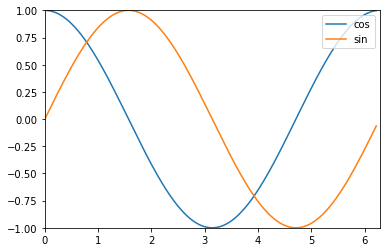

In [105]:
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep
import numpy as np

mb=master_bar(range(10))
mb.names=['cos','sin']
mb.main_bar.comment = f"Master Bar Statistics"
 
for i in mb:
    for j in progress_bar(range(100),parent=mb):
        if j%10 == 0:
            k = 100 * i + j
            x = np.arange(0, 2*k*np.pi/1000, 0.01)
            y1, y2 = np.cos(x), np.sin(x)
            graphs = [[x,y1], [x,y2]]
            x_bounds = [0, 2*np.pi]
            y_bounds = [-1,1]
            mb.update_graph(graphs, x_bounds, y_bounds)
            mb.child.comment = f"Progress Bar Statistics"
    mb.write(f'Finished loop {i}.')

## Deep copy

In [11]:
from copy import copy, deepcopy

orig_list = [[1,2],[3,4]]
print(f"Original List : \t\t {orig_list}")

direct_assign_list = orig_list
print(f"Directly assigned List : \t {direct_assign_list}")

shallow_copy_list = copy(orig_list)
print(f"Shallow copy List : \t\t {shallow_copy_list}")

deep_copy_list=deepcopy(orig_list)
print(f"Deep copy List : \t\t {deep_copy_list}")

# Change value
orig_list[0][0] = 10

print(f"Directly assigned List : \t {direct_assign_list}")
print(f"Shallow copy List : \t\t {shallow_copy_list}")
print(f"Deep copy List : \t\t {deep_copy_list}")


Original List : 		 [[1, 2], [3, 4]]
Directly assigned List : 	 [[1, 2], [3, 4]]
Shallow copy List : 		 [[1, 2], [3, 4]]
Deep copy List : 		 [[1, 2], [3, 4]]
Directly assigned List : 	 [[10, 2], [3, 4]]
Shallow copy List : 		 [[10, 2], [3, 4]]
Deep copy List : 		 [[1, 2], [3, 4]]


### Deduplicate using dict comprehension

In [25]:
names = ['Dana','Ana','Sara','Amber','Joyce','Dana','Ana','Tim','Sara']


print([name for name in names if 'a' in name.lower()])
print({name for name in names if 'a' in name.lower()})
print({name:index for index,name in enumerate(names) if 'a' in name.lower()})

['Dana', 'Ana', 'Sara', 'Amber', 'Dana', 'Ana', 'Sara']
{'Ana', 'Amber', 'Dana', 'Sara'}
{'Dana': 5, 'Ana': 6, 'Sara': 8, 'Amber': 3}


### Bool inherits int

In [29]:
print(True)
print(True+True)
print(False+True)
print(True/False)

True
2
1


ZeroDivisionError: division by zero

### Standard error

In [69]:
import sys

print("This goes to standard error", file=sys.stderr)
!more err

This goes to standard error
Cannot access file C:\rajesh\python3TRG\jupyter\myWork\err


In [1]:
import logging as logger
logger.basicConfig(level=logger.DEBUG)
logger.info("In God We Trust !")

INFO:root:In God We Trust !


### itertools slice

In [15]:
from itertools import cycle, islice

colours=["Red","Orange","Yellow","Green","Blue","Indigo","Violet"]

cycle_it=cycle(colours)

In [16]:
next(cycle_it)

'Red'

In [17]:
islice(cycle_it,2)

In [18]:
list(islice(cycle_it,2))

['Orange', 'Yellow']

### mock.unittest patch
#### Override temporarily

In [5]:
import os
from unittest.mock import patch

os.environ["ENV"] = "TEST"
print(os.environ["ENV"])

with patch.dict(os.environ, {'ENV': 'STG'}):
    print(os.environ["ENV"])
    
print(os.environ["ENV"])

TEST
STG
TEST


### List Comprehension

In [13]:
my_list_outer=[]

for elem in range(0,10):
    my_list_inner=[]
    for sub_elem in range(0,3) :
        my_list_inner.append(sub_elem)
        
    my_list_outer.append(my_list_inner)

print(my_list_outer)

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]


In [14]:
[my_list_inner_elem for my_list_inner_elem in range(0,3)]

[0, 1, 2]

In [17]:
[my_list_outer_elem for my_list_outer_elem in my_list_inner_elem ]

NameError: name 'my_list_inner_elem' is not defined

In [18]:
lists = [[1, 2, 3], [4, 5, 6, 7], [8, 9]]
[elem for sublist in lists for elem in sublist]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
from random import randint
r, g, b = [randint(0, 255) for _ in range(3)]
print(f"{r},{g},{b}")

19,187,128


#### Password generator using list comprehension

In [30]:
from string import ascii_lowercase, ascii_uppercase, punctuation, digits
from random import choice

"".join([choice(ascii_lowercase+ascii_uppercase+punctuation+digits) for _ in range(0,16)])

'9yfFz5Sbb:,Dyib#'

### argparse

In [38]:
import argparse

parser = argparse.ArgumentParser(description="Create a Carbon Code Image")

group = parser.add_mutually_exclusive_group(required=True)

group.add_argument("-f", "--file", type=str, help="File with code")
group.add_argument("-c", "--clipboard", action="store_true", help="Use code on clipboard")
group.add_argument("-s", "--snippet", type=str, help="Code snippet")

# python script.py

# python script.py -c -f script.py

_StoreAction(option_strings=['-s', '--snippet'], dest='snippet', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='Code snippet', metavar=None)

### Ellipses Object
https://florian-dahlitz.de/articles/what-is-pythons-ellipsis-object

In [39]:
...


Ellipsis

In [41]:
Ellipsis

Ellipsis

In [46]:
def return_tuple_two()-> tuple[int,int]:
    pass

def return_tuple_multi()-> tuple[int,...]:
    pass

from typing import Callable
def return_callable()-> Callable[..., int]:
    pass

#### Drop-in Replacement for the Pass-Keyword

In [49]:
def my_function_pass():
    pass

def my_function_num():
    1

def my_function_ellipsis():
    ...

### Specify the most general type for inputs and the most specific type for outputs.

In [52]:
pip install mypy

     |████████████████████████████████| 23.2 MB 22 kB/s  eta 0:00:01    |█████▊                          | 4.1 MB 773 kB/s eta 0:00:25     |███████████████                 | 10.8 MB 4.9 MB/s eta 0:00:03     |███████████████▉                | 11.4 MB 4.9 MB/s eta 0:00:03     |███████████████████████████▉    | 20.2 MB 9.5 MB/s eta 0:00:01     |███████████████████████████████▍| 22.8 MB 9.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from typing import List

def sum_of_elements(elements: List[int])-> int:
    sum_el = 0
    
    for element in elements:
        sum_el += element
        
    return sum_el

print(sum_of_elements((9,9)))



18


In [2]:
from typing import Iterable

def sum_of_elements(elements: Iterable[int])-> int:
    sum_el = 0
    
    for element in elements:
        sum_el += element
        
    return sum_el

print(sum_of_elements((9,9)))

18


## Date formatting using f strings

In [5]:
import datetime

today = datetime.datetime.today()
print(f"Unformatted : {today}")

today_ddmmyyyy = f"{today:%Y-%m-%d}"
print(f"Formatted YYYY-MM-DD :  {today_ddmmyyyy}")

today_yyyy = f"{today:%Y}"
print(f"Formatted YYYY :  {today_yyyy}")

Unformatted : 2021-10-06 01:35:33.588126
Formatted YYYY-MM-DD :  2021-10-06
Formatted YYYY :  2021


## why you shouldn't use lists as default values
#### https://twitter.com/mathsppblog/status/1445327870218444804?t=VIsssw0jYo0-UVQoCC4IIQ&s=03

In [7]:
def my_append(elem, l=[]):
    l.append(elem)
    
    return l


In [9]:
my_append.__name__

'my_append'

In [8]:
my_append.__defaults__

([],)

In [15]:
id(my_append.__defaults__)

140690452501504

In [14]:
id(my_append.__defaults__[0])

140690452163776

In [16]:
my_append('IGWT')

['IGWT']

In [17]:
my_append('IGWT')

['IGWT', 'IGWT']

In [18]:
my_append('IGWT')

['IGWT', 'IGWT', 'IGWT']

In [19]:
my_append('IGWT')

['IGWT', 'IGWT', 'IGWT', 'IGWT']

In [20]:
id(my_append.__defaults__[0])

140690452163776

## @property

### Without @property

In [22]:
class Celsius:
    def __init__(self, temp_in_celsius: float = 0)-> None:
        self.temp_in_celsius = temp_in_celsius
        
    def to_fahrenheit(self)-> float :
        return (self.temp_in_celsius * 1.8)+32

In [23]:
human = Celsius(37)

# human.temp_in_celsius = 37

print(human.temp_in_celsius)

print(human.to_fahrenheit())

37
98.60000000000001


### Without @property - with getters and setters

In [28]:
class Celsius:
    def __init__(self, temp_in_celsius: float)-> None:
        self.set_temperature(temp_in_celsius)
        
    def to_fahrenheit(self)-> float :
        return (self._temp_in_celsius * 1.8)+32
    
    # Getter
    def get_temperature(self)-> float:
        return self._temp_in_celsius
    
    # Setter
    def set_temperature(self, value)-> None:
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
            
        self._temp_in_celsius = value
        

In [34]:
human = Celsius(37)

print(human.get_temperature())

print(human.to_fahrenheit())

human.set_temperature(300)

print(human.get_temperature())

print(human.to_fahrenheit())

human.set_temperature(-300)

37
98.60000000000001
300
572.0


ValueError: Temperature below -273.15 is not possible

### Explicity using property()

In [38]:
class Celsius:
    def __init__(self, temp_in_celsius: float)-> None:
        self.set_temperature(temp_in_celsius)
        
    def to_fahrenheit(self)-> float :
        return (self._temp_in_celsius * 1.8)+32
    
    # Getter
    def get_temperature(self)-> float:
        print("Getting value...")
        return self._temp_in_celsius
    
    # Setter
    def set_temperature(self, value)-> None:
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
            
        self._temp_in_celsius = value
        
    # property(fget=None, fset=None, fdel=None, doc=None)
    # make empty property
    # temperature = property()
    # assign fget
    # temperature = temperature.getter(get_temperature)
    # assign fset
    # temperature = temperature.setter(set_temperature)
    temperature = property(get_temperature, set_temperature)
        

In [36]:
human = Celsius(37)

print(human.get_temperature())

print(human.to_fahrenheit())

human.set_temperature(300)

print(human.get_temperature())

print(human.to_fahrenheit())

human.set_temperature(-300)

Setting value...
Getting value...
37
98.60000000000001
Setting value...
Getting value...
300
572.0
Setting value...


ValueError: Temperature below -273.15 is not possible

### Using @property decorator

In [63]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self):
        print("Getting value...")
        return self._temperature

    @temperature.setter
    def temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value

In [64]:
human = Celsius(37)

print(human.temperature)

Setting value...
Getting value...
37


## Emojis

In [70]:
print("\U0001F923")
print("\U0001F606")
print("\U0001f600")

🤣
😆
😀


In [73]:
query={}
query['orderNum'] = '12345'
print(query)
print

{'orderNum': '12345'}


<function print>